In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading and Exploring the Data
xls = pd.ExcelFile('E:/Capstone_2nd_Year/AutoML/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION,Unnamed: 5
0,2836,58,management,married,tertiary,NaN
1,2837,44,technician,single,secondary,NaN
2,2838,33,entrepreneur,married,secondary,NaN
3,2839,47,blue-collar,married,unknown,NaN
4,2840,33,unknown,single,unknown,NaN


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN,Unnamed: 5
0,2836,no,2143,yes,no,NaN
1,2837,no,29,yes,no,NaN
2,2838,no,2,yes,yes,NaN
3,2839,no,1506,yes,no,NaN
4,2840,no,1,no,no,NaN


In [7]:
subscription_history.head()

,ID,TERM_DEPOSIT,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2836,no,NaN,NaN,NaN,NaN
1,2837,no,NaN,NaN,NaN,NaN
2,2838,no,NaN,NaN,NaN,NaN
3,2839,no,NaN,NaN,NaN,NaN
4,2840,no,NaN,NaN,NaN,NaN


In [8]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, subscription_history, on = ['ID'])
df.columns

Index(['ID', 'AGE', 'JOB', 'MARITAL', 'EDUCATION', 'Unnamed: 5_x', 'DEFAULT',
       'BALANCE', 'HOUSING', 'LOAN', 'Unnamed: 5_y', 'TERM_DEPOSIT',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [9]:
df.shape

(45211, 16)

In [10]:
df=df.drop(['ID'], axis = 1)
df.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'Unnamed: 5_x', 'DEFAULT',
       'BALANCE', 'HOUSING', 'LOAN', 'Unnamed: 5_y', 'TERM_DEPOSIT',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [11]:
df.isnull().sum()

AGE                 0
JOB                 0
MARITAL             0
EDUCATION           0
Unnamed: 5_x    45211
DEFAULT             0
BALANCE             0
HOUSING             0
LOAN                0
Unnamed: 5_y    45211
TERM_DEPOSIT        0
Unnamed: 2      45211
Unnamed: 3      45211
Unnamed: 4      45211
Unnamed: 5      45211
dtype: int64

In [12]:
df = df.drop(['Unnamed: 5_x','Unnamed: 5_y','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'], axis=1)

In [13]:
df.isnull().sum()

AGE             0
JOB             0
MARITAL         0
EDUCATION       0
DEFAULT         0
BALANCE         0
HOUSING         0
LOAN            0
TERM_DEPOSIT    0
dtype: int64

In [14]:
df.rename(columns = {'TERM_DEPOSIT':'LOAN_STATUS'}, inplace = True)

In [15]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [16]:
pd.value_counts(df.LOAN_STATUS)

no     39922
yes     5289
Name: LOAN_STATUS, dtype: int64

In [17]:
df.describe()

,AGE,BALANCE
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [18]:
df.dtypes

AGE             int64
JOB            object
MARITAL        object
EDUCATION      object
DEFAULT        object
BALANCE         int64
HOUSING        object
LOAN           object
LOAN_STATUS    object
dtype: object

# Data Prep & Start H2O

In [19]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,7 hours 39 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,6 months and 25 days !!!
H2O_cluster_name:,H2O_from_python_user_83r1zh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.233 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [20]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
h2o_df.describe()

Rows:45211
Cols:9




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
type,int,enum,enum,enum,enum,int,enum,enum,enum
mins,18.0,,,,,-8019.0,,,
mean,40.936210214327815,,,,,1362.2720576850813,,,
maxs,95.0,,,,,102127.0,,,
sigma,10.618762040975405,,,,,3044.7658291685257,,,
zeros,0,,,,,3514,,,
missing,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,no
1,44.0,technician,single,secondary,no,29.0,yes,no,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,no


In [22]:
h2o_df['LOAN_STATUS'] = h2o_df['LOAN_STATUS'].asfactor()
#70% train, 15% test, 15% validation
train, test, validation = h2o_df.split_frame(ratios=[0.70, 0.15], seed=17)
x = train.columns
y = 'LOAN_STATUS'

In [23]:
x.remove(y)

In [24]:
print(train.shape)
print(test.shape)

(31736, 9)
(6672, 9)


# Run H2O AutoML

In [25]:
from h2o.automl import H2OAutoML

In [26]:
aml = H2OAutoML(max_runtime_secs = 180,
                max_models = 25,
                balance_classes = True,
                stopping_metric = 'AUC',
                stopping_rounds = 3,
                project_name = 'P1',
                verbosity = 'info',
                seed = 1)
# validation frame used for early stopping of individual models and early stopping of the grid searches 
#(unless max_models or max_runtime_secs overrides metric-based early stopping)
# a leaderboard frame will be generated automatically from the training frame,to use to score and rank models on the leaderboard..
%time aml.train(y=y, training_frame = train, validation_frame = validation)

AutoML progress: |█
20:44:54.501: Project: P1
20:44:54.501: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
20:44:54.502: Setting stopping tolerance adaptively based on the training frame: 0.00561337306318209
20:44:54.502: Build control seed: 1
20:44:54.502: training frame: Frame key: AutoML_8_20220716_204454_training_py_3_sid_bae3    cols: 9    rows: 31736  chunks: 1    size: 275976  checksum: -16186429663866
20:44:54.502: validation frame: Frame key: py_5_sid_bae3    cols: 9    rows: 6803  chunks: 1    size: 63606  checksum: 1020755035197018
20:44:54.502: leaderboard frame: NULL
20:44:54.502: blending frame: NULL
20:44:54.502: response column: LOAN_STATUS
20:44:54.502: fold column: null
20:44:54.502: weights column: null
20:44:54.502: AutoML: XGBoost is not available; skipping 

,,no,yes,Error,Rate
0,no,7975.0,876.0,0.099,(876.0/8851.0)
1,yes,418.0,801.0,0.3429,(418.0/1219.0)
2,Total,8393.0,1677.0,0.1285,(1294.0/10070.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.186467,0.553177,179.0
1,max f2,0.117128,0.679419,247.0
2,max f0point5,0.262720,0.583002,121.0
3,max accuracy,0.262720,0.902085,121.0
4,max precision,0.718058,1.000000,0.0
5,max recall,0.056100,1.000000,337.0
6,max specificity,0.718058,1.000000,0.0
7,max absolute_mcc,0.227059,0.493721,144.0
8,max min_per_class_accuracy,0.137674,0.820246,224.0
9,max mean_per_class_accuracy,0.111455,0.832090,253.0



Gains/Lift Table: Avg response rate: 12.11 %, avg score: 11.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010030,0.505454,8.015497,8.015497,0.970297,0.557315,0.970297,0.557315,0.080394,0.080394,701.549720,701.549720,0.080055
1,2,0.020060,0.406796,6.379681,7.197589,0.772277,0.449152,0.871287,0.503234,0.063987,0.144381,537.968145,619.758932,0.141443
2,3,0.030089,0.356584,5.725355,6.706845,0.693069,0.380316,0.811881,0.462261,0.057424,0.201805,472.535514,570.684460,0.195365
3,4,0.040020,0.325876,5.039130,6.293020,0.610000,0.341737,0.761787,0.432354,0.050041,0.251846,403.913043,529.301974,0.241000
4,5,0.050050,0.302388,4.743866,5.982574,0.574257,0.313623,0.724206,0.408561,0.047580,0.299426,374.386569,498.257419,0.283721
5,6,0.100000,0.235808,3.810182,4.897457,0.461233,0.264404,0.592850,0.336554,0.190320,0.489746,281.018238,389.745693,0.443423
6,7,0.150050,0.196067,2.524155,4.105833,0.305556,0.214690,0.497022,0.295906,0.126333,0.616079,152.415459,310.583259,0.530213
7,8,0.200000,0.165617,2.151439,3.617719,0.260437,0.181046,0.437934,0.267219,0.107465,0.723544,115.143919,261.771944,0.595649
8,9,0.300000,0.121586,1.517637,2.917692,0.183714,0.141125,0.353194,0.225188,0.151764,0.875308,51.763741,191.769210,0.654542
9,10,0.400000,0.097157,0.787531,2.385152,0.095333,0.107866,0.288729,0.195858,0.078753,0.954061,-21.246924,138.515176,0.630368




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.09240199846768272
RMSE: 0.30397697029163695
LogLoss: 0.3240383404633491
Null degrees of freedom: 6802
Residual degrees of freedom: 6797
Null deviance: 4801.381766918323
Residual deviance: 4408.865660344328
AIC: 4420.865660344328
AUC: 0.6945973251703718
AUCPR: 0.2800774280744175
Gini: 0.3891946503407435

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19382086699901352: 


,,no,yes,Error,Rate
0,no,5327.0,707.0,0.1172,(707.0/6034.0)
1,yes,467.0,302.0,0.6073,(467.0/769.0)
2,Total,5794.0,1009.0,0.1726,(1174.0/6803.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.193821,0.339708,167.0
1,max f2,0.093182,0.435433,276.0
2,max f0point5,0.261792,0.349705,115.0
3,max accuracy,0.514863,0.888579,19.0
4,max precision,0.625349,1.000000,0.0
5,max recall,0.008705,1.000000,398.0
6,max specificity,0.625349,1.000000,0.0
7,max absolute_mcc,0.218807,0.247164,145.0
8,max min_per_class_accuracy,0.099808,0.640206,267.0
9,max mean_per_class_accuracy,0.128055,0.651578,231.0



Gains/Lift Table: Avg response rate: 11.30 %, avg score: 11.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010143,0.466513,4.743804,4.743804,0.536232,0.521696,0.536232,0.521696,0.048114,0.048114,374.380430,374.380430,0.042811
1,2,0.020138,0.393644,3.902891,4.326417,0.441176,0.425345,0.489051,0.473872,0.039012,0.087126,290.289146,332.641690,0.075525
2,3,0.030134,0.347886,3.902891,4.185930,0.441176,0.366838,0.473171,0.438368,0.039012,0.126138,290.289146,318.593041,0.108239
3,4,0.040129,0.310423,3.122313,3.921000,0.352941,0.329872,0.443223,0.411344,0.031209,0.157347,212.231316,292.100011,0.132157
4,5,0.050125,0.289115,2.862120,3.709845,0.323529,0.298974,0.419355,0.388936,0.028609,0.185956,186.212040,270.984521,0.153142
5,6,0.100103,0.225567,2.341735,3.026795,0.264706,0.251211,0.342144,0.320175,0.117035,0.302991,134.173487,202.679453,0.228745
6,7,0.150081,0.191798,1.847369,2.634038,0.208824,0.208374,0.297747,0.282944,0.092328,0.395319,84.736862,163.403762,0.276492
7,8,0.200059,0.161866,1.144848,2.262014,0.129412,0.176088,0.255694,0.256250,0.057217,0.452536,14.484816,126.201380,0.284654
8,9,0.300015,0.120543,1.027761,1.850798,0.116176,0.139814,0.209211,0.217457,0.102731,0.555267,2.776142,85.079791,0.287782
9,10,0.399971,0.097649,0.923684,1.619105,0.104412,0.108146,0.183021,0.190139,0.092328,0.647594,-7.631569,61.910470,0.279182




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.09412678757956938
RMSE: 0.3068008924034762
LogLoss: 0.32644549174416215
Null degrees of freedom: 31735
Residual degrees of freedom: 31730
Null deviance: 22873.406940629004
Residual deviance: 20720.14825198546
AIC: 20732.14825198546
AUC: 0.7108153056873601
AUCPR: 0.28621532723044957
Gini: 0.42163061137472013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19055497772296764: 


,,no,yes,Error,Rate
0,no,24552.0,3480.0,0.1241,(3480.0/28032.0)
1,yes,2142.0,1562.0,0.5783,(2142.0/3704.0)
2,Total,26694.0,5042.0,0.1771,(5622.0/31736.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.190555,0.357192,187.0
1,max f2,0.115517,0.453831,258.0
2,max f0point5,0.283088,0.359694,122.0
3,max accuracy,0.639741,0.883413,4.0
4,max precision,0.639741,0.642857,4.0
5,max recall,0.013417,1.000000,397.0
6,max specificity,0.681166,0.999964,0.0
7,max absolute_mcc,0.190555,0.261356,187.0
8,max min_per_class_accuracy,0.105518,0.654074,271.0
9,max mean_per_class_accuracy,0.130073,0.666186,242.0



Gains/Lift Table: Avg response rate: 11.67 %, avg score: 11.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010020,0.477280,4.068469,4.068469,0.474843,0.545585,0.474843,0.545585,0.040767,0.040767,306.846924,306.846924,0.034809
1,2,0.020009,0.408592,4.162389,4.115355,0.485804,0.439694,0.480315,0.492723,0.041577,0.082343,316.238903,311.535518,0.070571
2,3,0.030029,0.366023,3.529599,3.919898,0.411950,0.385583,0.457503,0.456972,0.035367,0.117711,252.959914,291.989829,0.099267
3,4,0.040018,0.334478,3.675876,3.858989,0.429022,0.348900,0.450394,0.429997,0.036717,0.154428,267.587602,285.898879,0.129528
4,5,0.050006,0.308450,3.351534,3.757626,0.391167,0.322183,0.438563,0.408461,0.033477,0.187905,235.153402,275.762574,0.156120
5,6,0.100013,0.235724,2.461893,3.109759,0.287335,0.267434,0.362949,0.337947,0.123110,0.311015,146.189273,210.975923,0.238883
6,7,0.150019,0.195805,1.830223,2.683247,0.213611,0.213998,0.313170,0.296631,0.091523,0.402538,83.022288,168.324712,0.285885
7,8,0.200025,0.164340,1.538683,2.397106,0.179584,0.179128,0.279773,0.267255,0.076944,0.479482,53.868295,139.710608,0.316382
8,9,0.300006,0.124072,1.128723,1.974401,0.131737,0.142046,0.230438,0.225527,0.112851,0.592333,12.872312,97.440057,0.330953
9,10,0.400019,0.101594,0.766642,1.672437,0.089477,0.112118,0.195195,0.197173,0.076674,0.669006,-23.335797,67.243715,0.304530


# AutoML Leaderboard and Ensemble Exploration

In [27]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454,0.710815,0.326445,0.286215,0.351219,0.306801,0.0941268
StackedEnsemble_AllModels_2_AutoML_8_20220716_204454,0.710589,0.326455,0.286061,0.344115,0.306765,0.0941046
StackedEnsemble_AllModels_1_AutoML_8_20220716_204454,0.710347,0.326806,0.284202,0.351165,0.306946,0.0942157
StackedEnsemble_BestOfFamily_2_AutoML_8_20220716_204454,0.710149,0.326896,0.284905,0.346986,0.30696,0.0942247
DRF_1_AutoML_8_20220716_204454,0.704951,0.33437,0.286943,0.34251,0.309266,0.0956456
GBM_2_AutoML_8_20220716_204454,0.701234,0.331476,0.263136,0.352149,0.309638,0.0958756
XRT_1_AutoML_8_20220716_204454,0.700893,0.337806,0.271597,0.354919,0.312968,0.0979493
GBM_4_AutoML_8_20220716_204454,0.700447,0.334691,0.270076,0.351465,0.309524,0.095805
GBM_3_AutoML_8_20220716_204454,0.700335,0.332374,0.260778,0.353529,0.309812,0.0959832
StackedEnsemble_BestOfFamily_1_AutoML_8_20220716_204454,0.699799,0.33095,0.261124,0.358147,0.30917,0.0955859


In [28]:
se = aml.leader

In [29]:
metalearner = h2o.get_model(se.metalearner()['name'])

C:\ProgramData\Anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


# In this step, we explore the base learners of the stacked ensemble model and select the best performing base learning model.

In [30]:
metalearner.varimp()

[('DRF_1_AutoML_8_20220716_204454',
  0.45089760422706604,
  1.0,
  0.5377771520927915),
 ('XRT_1_AutoML_8_20220716_204454',
  0.21615146100521088,
  0.4793803714609224,
  0.25779981093343934),
 ('GBM_2_AutoML_8_20220716_204454',
  0.10483089834451675,
  0.23249380205561107,
  0.12502985474869172),
 ('DeepLearning_1_AutoML_8_20220716_204454',
  0.03858282417058945,
  0.08556892697784141,
  0.046017013857779586),
 ('GLM_1_AutoML_8_20220716_204454',
  0.027984146028757095,
  0.062063195205323496,
  0.03337616836729786)]

In [31]:
##  Base Learner GBM Model Exploration
model = h2o.get_model('DRF_1_AutoML_8_20220716_204454')

In [32]:
## Now, we calculate error on this base learning model and plot the feature importance plot using this model.
model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.09827999794743628
RMSE: 0.31349640818905133
LogLoss: 0.34276534237738254
Mean Per-Class Error: 0.33371504339440694
AUC: 0.7075412431024323
AUCPR: 0.32091330017709957
Gini: 0.41508248620486454

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1358519591749595: 


,,no,yes,Error,Rate
0,no,4976.0,880.0,0.1503,(880.0/5856.0)
1,yes,422.0,394.0,0.5172,(422.0/816.0)
2,Total,5398.0,1274.0,0.1951,(1302.0/6672.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.135852,0.377033,197.0
1,max f2,0.080709,0.463092,266.0
2,max f0point5,0.215168,0.395390,124.0
3,max accuracy,0.492311,0.880246,17.0
4,max precision,0.947422,1.000000,0.0
5,max recall,0.005985,1.000000,396.0
6,max specificity,0.947422,1.000000,0.0
7,max absolute_mcc,0.197602,0.285411,139.0
8,max min_per_class_accuracy,0.078751,0.651981,269.0
9,max mean_per_class_accuracy,0.126052,0.667581,207.0



Gains/Lift Table: Avg response rate: 12.23 %, avg score:  8.98 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010042,0.410595,4.515364,4.515364,0.552239,0.492477,0.552239,0.492477,0.045343,0.045343,351.536435,351.536435,0.040220
1,2,0.020084,0.343480,4.271291,4.393327,0.522388,0.374006,0.537313,0.433241,0.042892,0.088235,327.129061,339.332748,0.077648
2,3,0.030126,0.303852,3.783143,4.189933,0.462687,0.321447,0.512438,0.395976,0.037990,0.126225,278.314311,318.993269,0.109491
3,4,0.040018,0.267672,4.583779,4.287288,0.560606,0.285494,0.524345,0.368666,0.045343,0.171569,358.377897,328.728795,0.149881
4,5,0.050060,0.244962,2.806848,3.990313,0.343284,0.255967,0.488024,0.346059,0.028186,0.199755,180.684811,299.031349,0.170554
5,6,0.100120,0.193093,2.545967,3.268140,0.311377,0.215810,0.399701,0.280934,0.127451,0.327206,154.596689,226.814019,0.258729
6,7,0.150030,0.157711,1.743332,2.760886,0.213213,0.173878,0.337662,0.245320,0.087010,0.414216,74.333157,176.088617,0.300998
7,8,0.200240,0.131774,1.537665,2.454165,0.188060,0.143591,0.300150,0.219812,0.077206,0.491422,53.766462,145.416520,0.331756
8,9,0.300060,0.095191,0.834835,1.915467,0.102102,0.111408,0.234266,0.183749,0.083333,0.574755,-16.516517,91.546689,0.312972
9,10,0.400030,0.076248,0.980686,1.681859,0.119940,0.084786,0.205695,0.159018,0.098039,0.672794,-1.931387,68.185926,0.310772


In [33]:
val_perf = model.model_performance(test)
print(val_perf.auc())
print(val_perf.accuracy()) #returns: The accuracy for this set of metrics and thresholds

0.7075412431024323
[[0.4923108090812026, 0.8802458033573142]]


In [34]:
## Predictions
## Validation object is type of h2o frame. We will pass it to predict method directly.
predictions = model.predict(test_data = test)
predictions.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,no,yes
no,0.942108,0.0578921
no,0.893068,0.106932
no,0.948602,0.051398
no,0.971575,0.0284249
no,0.924035,0.0759648
no,0.929495,0.0705046
no,0.955136,0.044864
no,0.956646,0.0433542
no,0.957435,0.0425649
no,0.933718,0.0662822


In [36]:
predictions.head(50)

predict,no,yes
no,0.942108,0.0578921
no,0.893068,0.106932
no,0.948602,0.051398
no,0.971575,0.0284249
no,0.924035,0.0759648
no,0.929495,0.0705046
no,0.955136,0.044864
no,0.956646,0.0433542
no,0.957435,0.0425649
no,0.933718,0.0662822


In [37]:
predictions.tail(50)

predict,no,yes
yes,0.743634,0.256366
yes,0.665207,0.334793
no,0.924569,0.0754315
yes,0.826369,0.173631
yes,0.625665,0.374335
no,0.909306,0.0906935
no,0.86334,0.13666
no,0.881748,0.118252
yes,0.492106,0.507894
yes,0.657696,0.342304


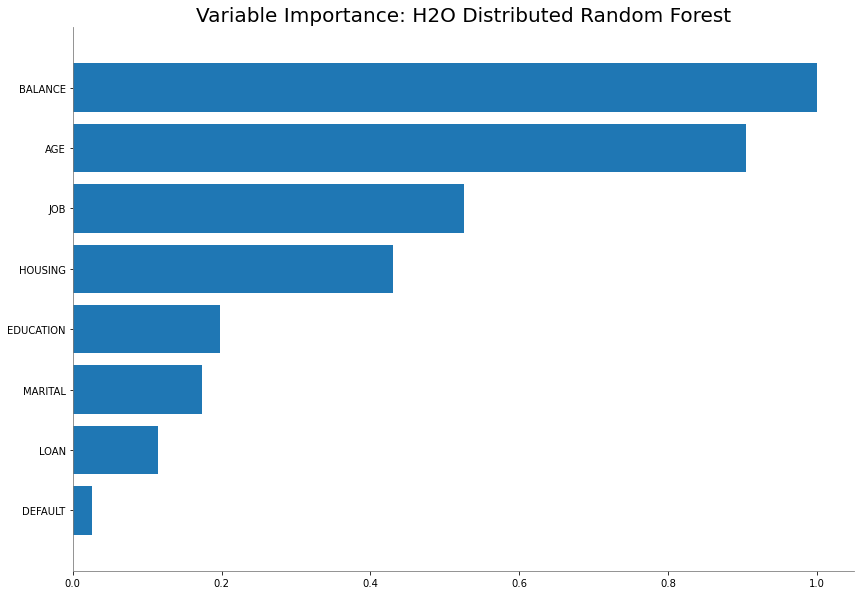

<Figure size 432x288 with 0 Axes>

In [38]:
model.varimp_plot(num_of_features = 20)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454,0.710815,0.326445,0.286215,0.351219,0.306801,0.0941268,13849,0.025501,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_8_20220716_204454,0.710589,0.326455,0.286061,0.344115,0.306765,0.0941046,18504,0.043854,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_8_20220716_204454,0.710347,0.326806,0.284202,0.351165,0.306946,0.0942157,14430,0.032609,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_8_20220716_204454,0.710149,0.326896,0.284905,0.346986,0.30696,0.0942247,11239,0.025691,StackedEnsemble
DRF_1_AutoML_8_20220716_204454,0.704951,0.33437,0.286943,0.34251,0.309266,0.0956456,3593,0.023886,DRF
GBM_2_AutoML_8_20220716_204454,0.701234,0.331476,0.263136,0.352149,0.309638,0.0958756,1356,0.015122,GBM
XRT_1_AutoML_8_20220716_204454,0.700893,0.337806,0.271597,0.354919,0.312968,0.0979493,2399,0.014112,DRF
GBM_4_AutoML_8_20220716_204454,0.700447,0.334691,0.270076,0.351465,0.309524,0.095805,2296,0.024992,GBM
GBM_3_AutoML_8_20220716_204454,0.700335,0.332374,0.260778,0.353529,0.309812,0.0959832,1677,0.016877,GBM
StackedEnsemble_BestOfFamily_1_AutoML_8_20220716_204454,0.699799,0.33095,0.261124,0.358147,0.30917,0.0955859,11065,0.018466,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19066788014094443: 


,,no,yes,Error,Rate
0,no,5141.0,715.0,0.1221,(715.0/5856.0)
1,yes,460.0,356.0,0.5637,(460.0/816.0)
2,Total,5601.0,1071.0,0.1761,(1175.0/6672.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

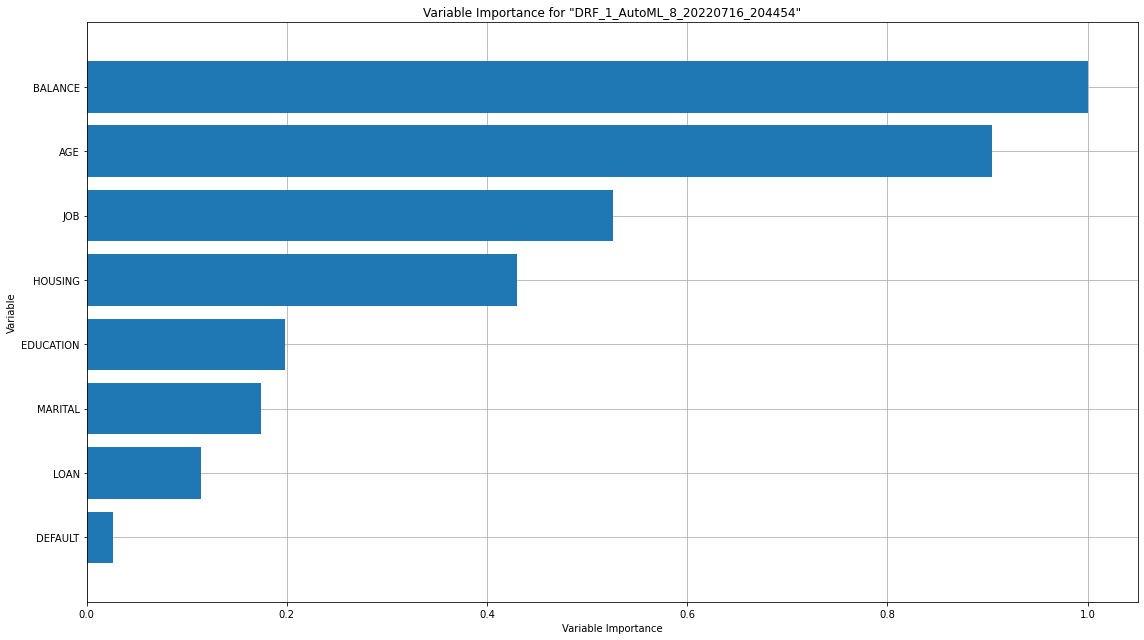

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

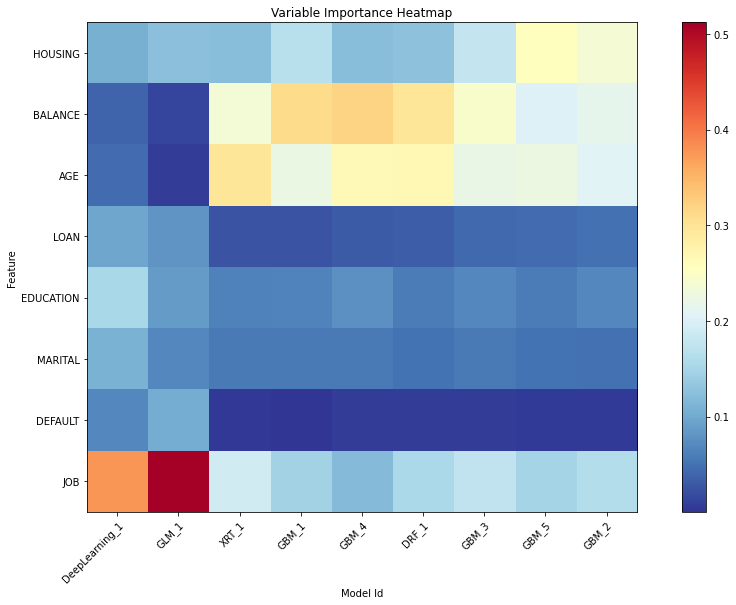

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

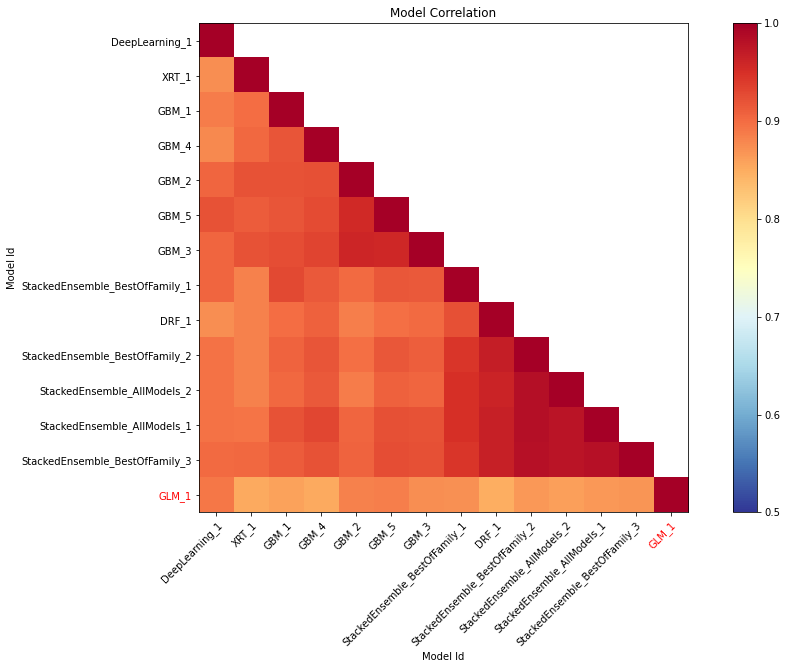

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

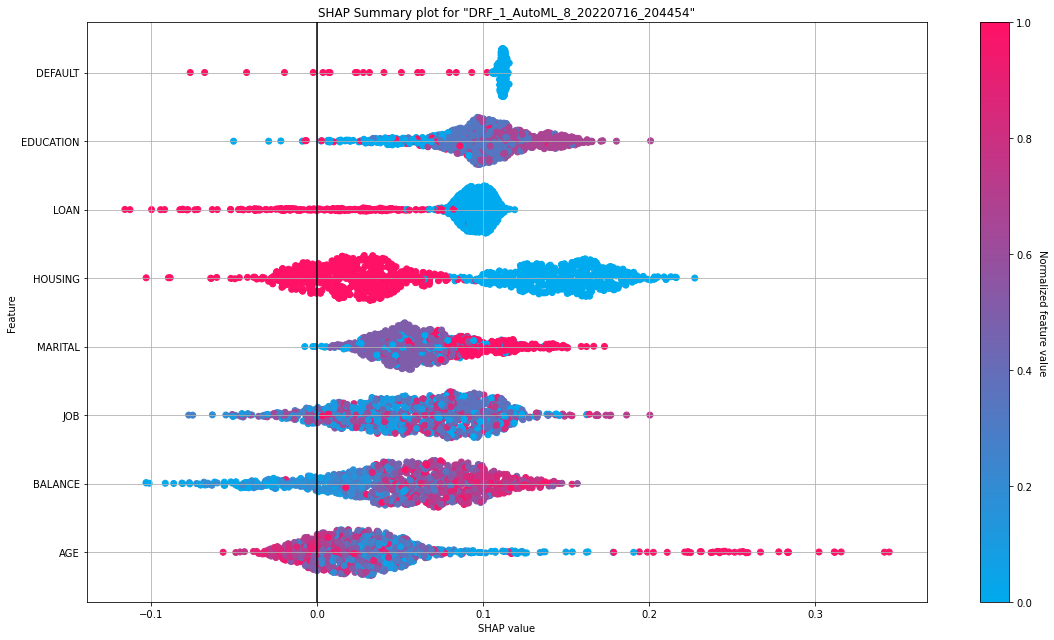

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

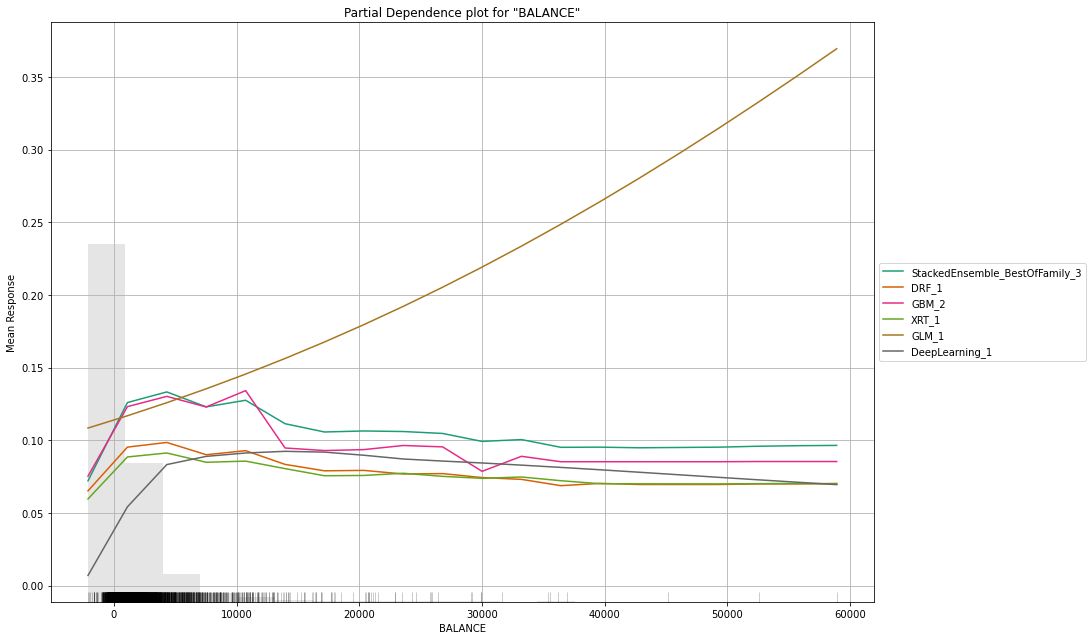

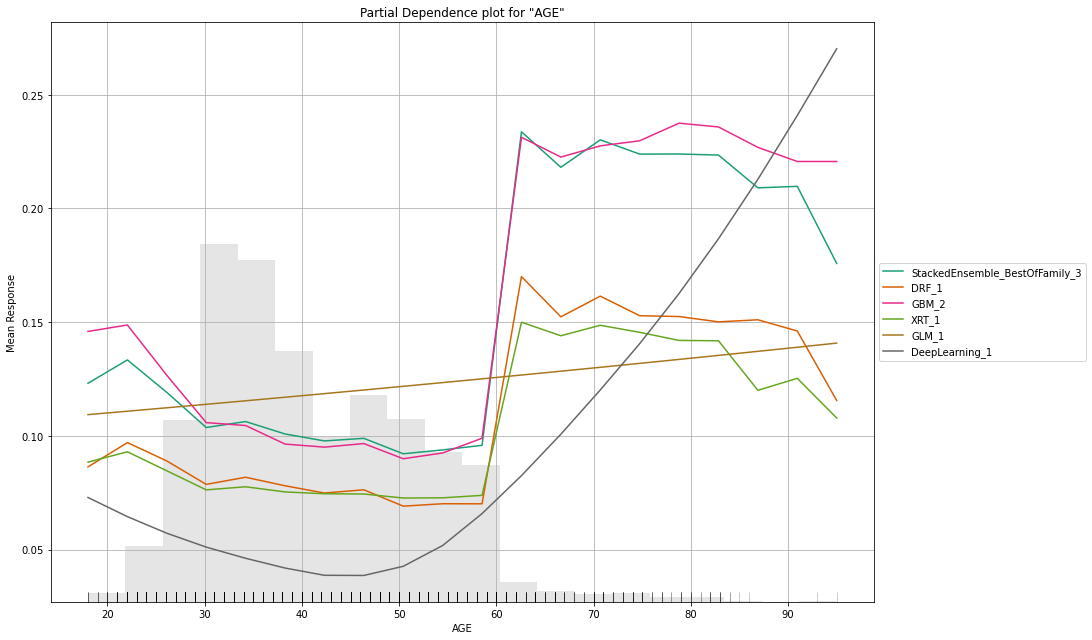

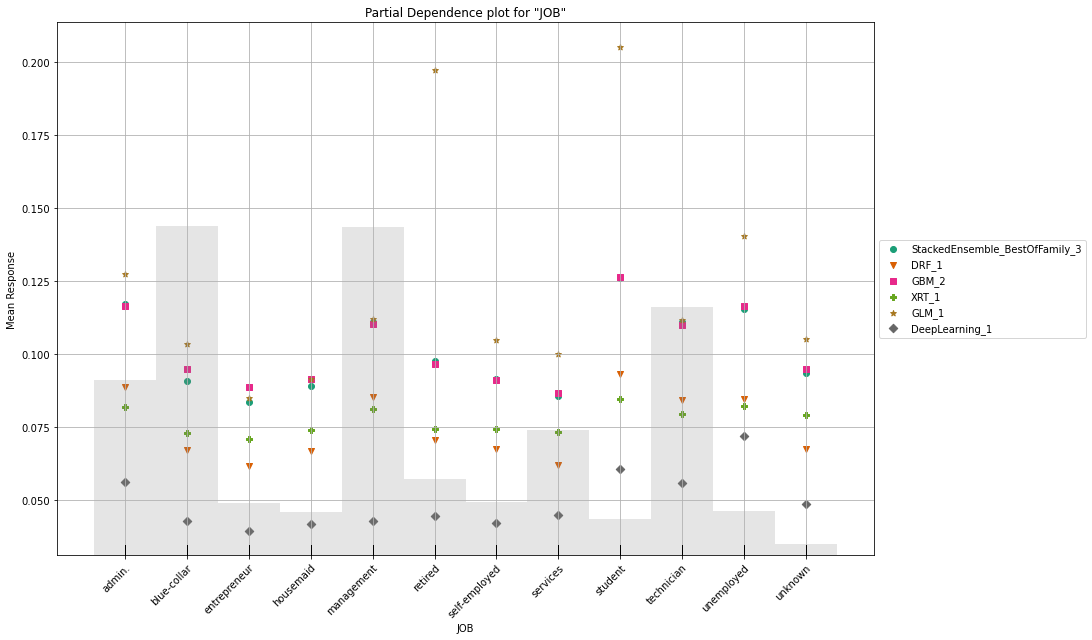

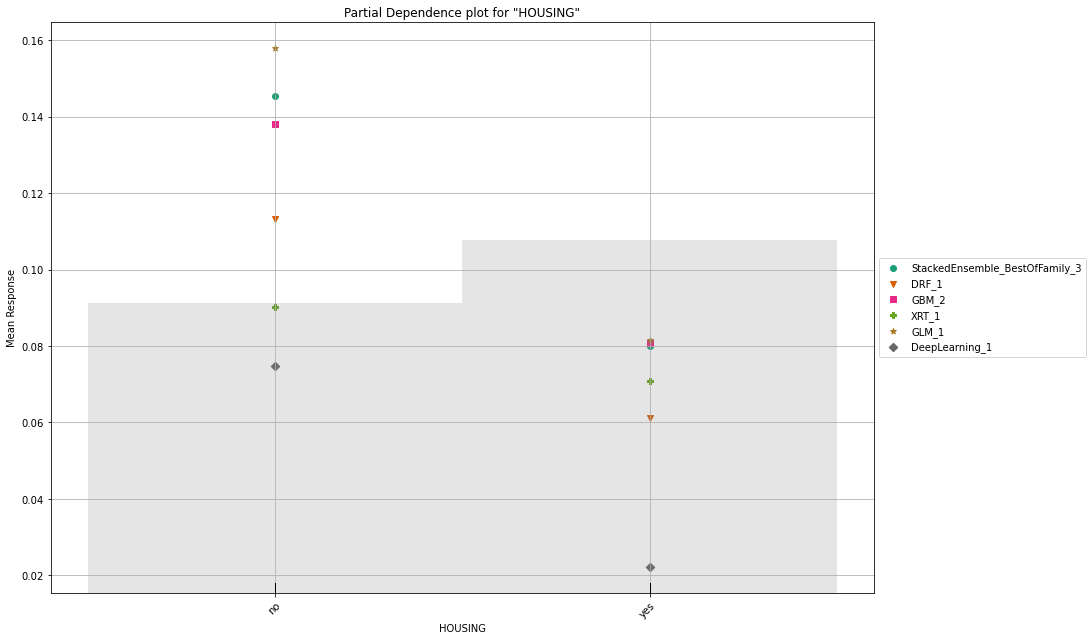

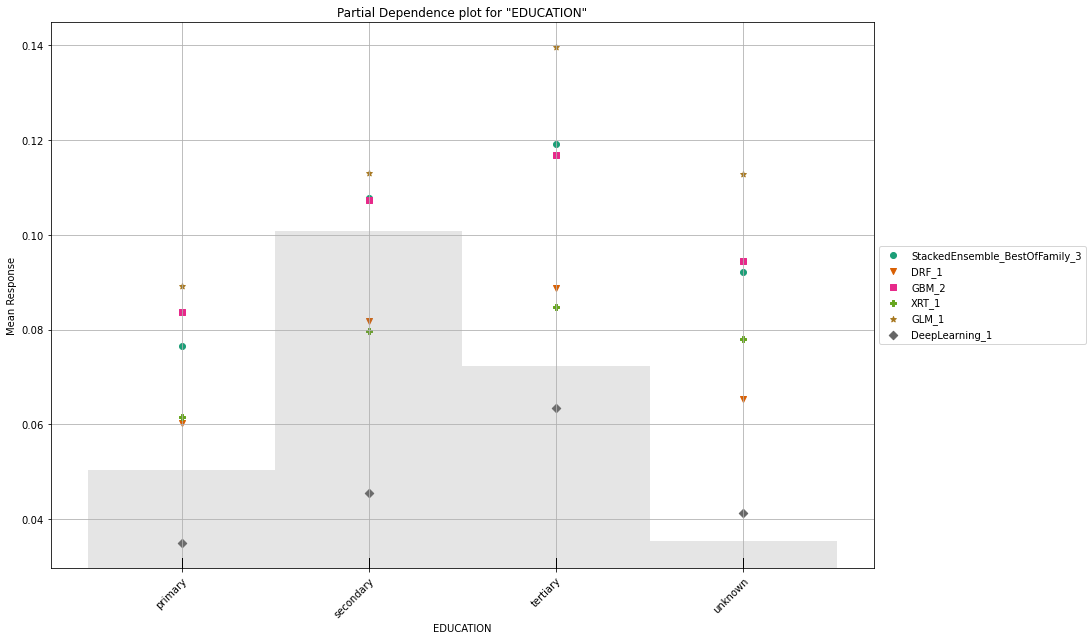

In [39]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19066788014094443: 


,,no,yes,Error,Rate
0,no,5141.0,715.0,0.1221,(715.0/5856.0)
1,yes,460.0,356.0,0.5637,(460.0/816.0)
2,Total,5601.0,1071.0,0.1761,(1175.0/6672.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

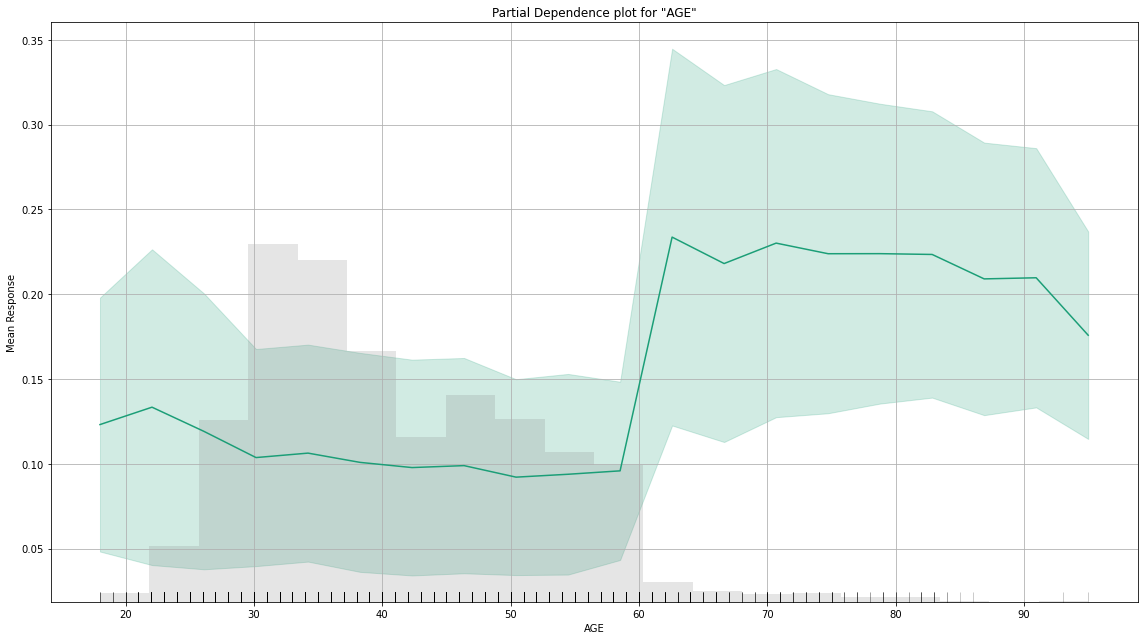

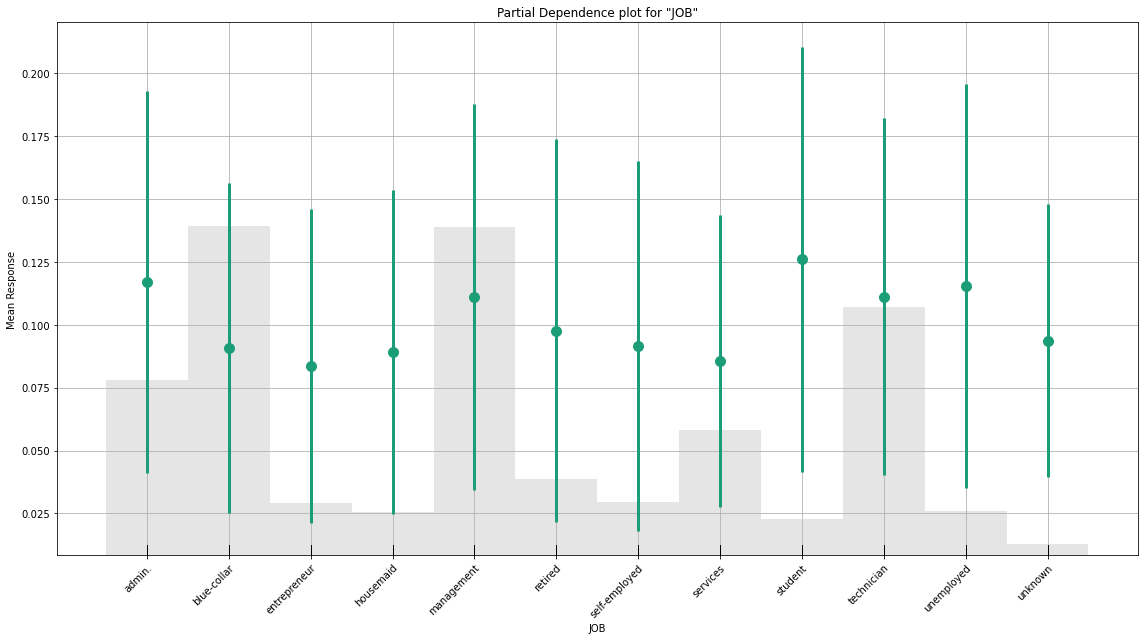

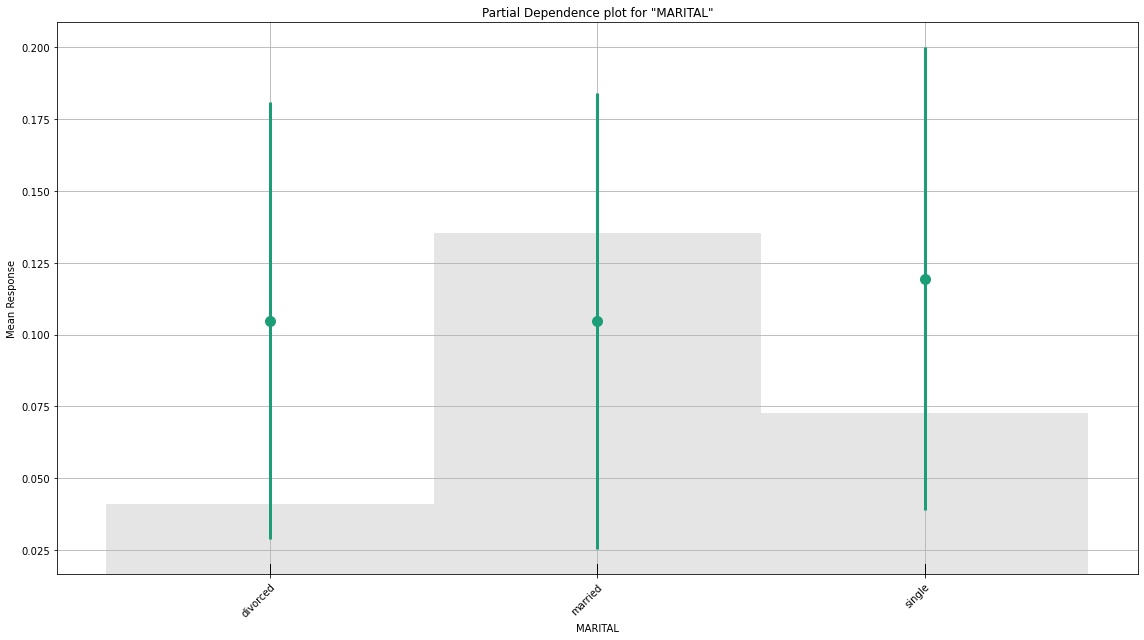

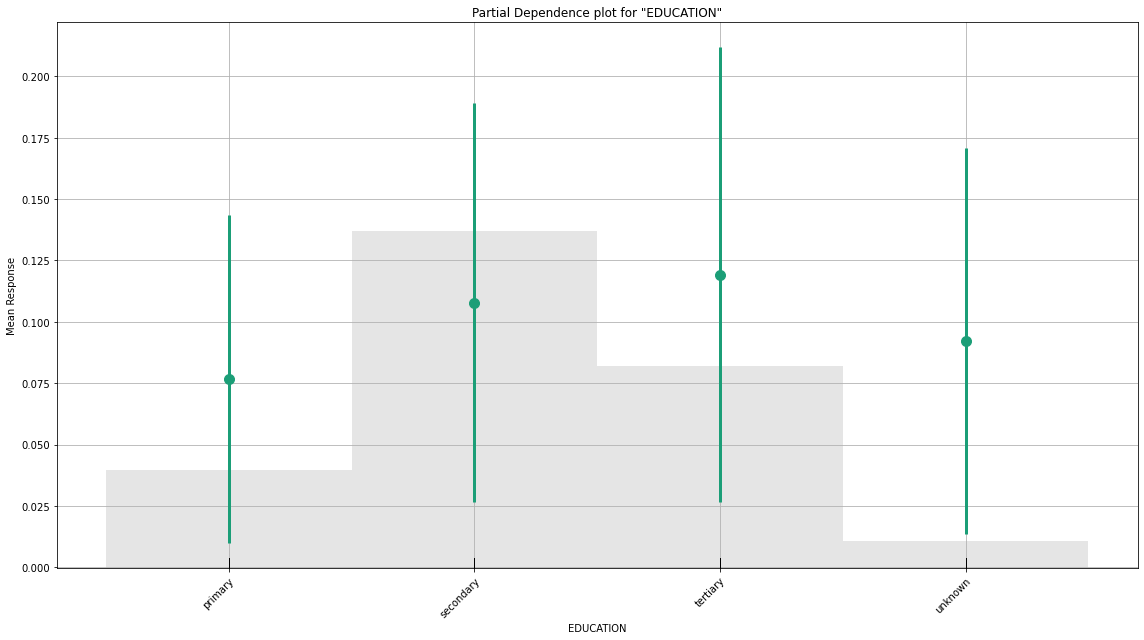

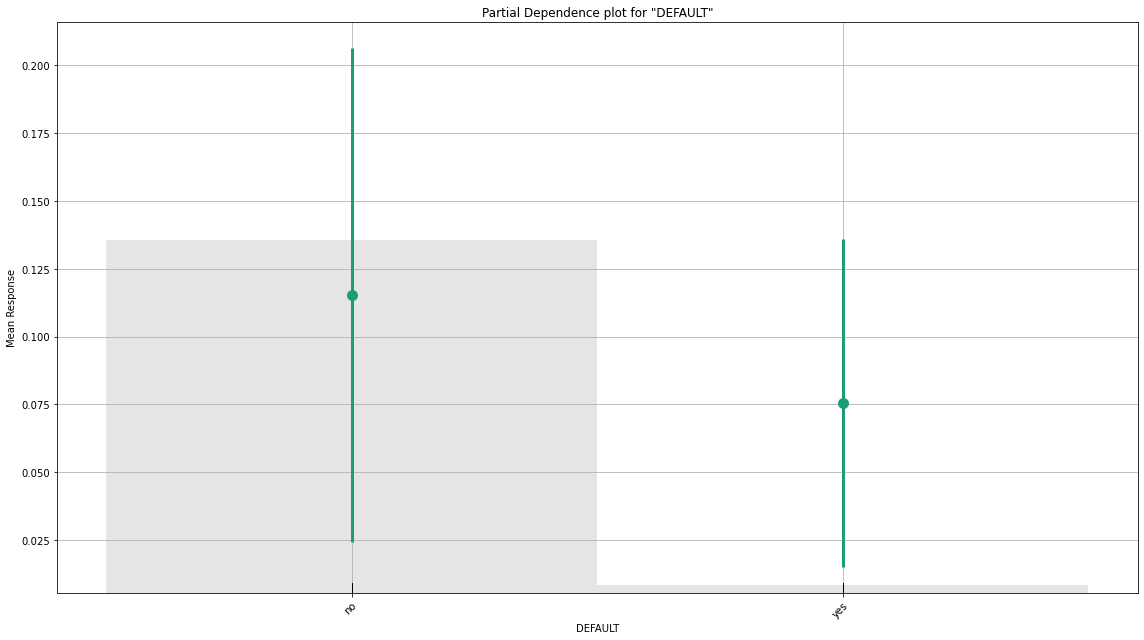

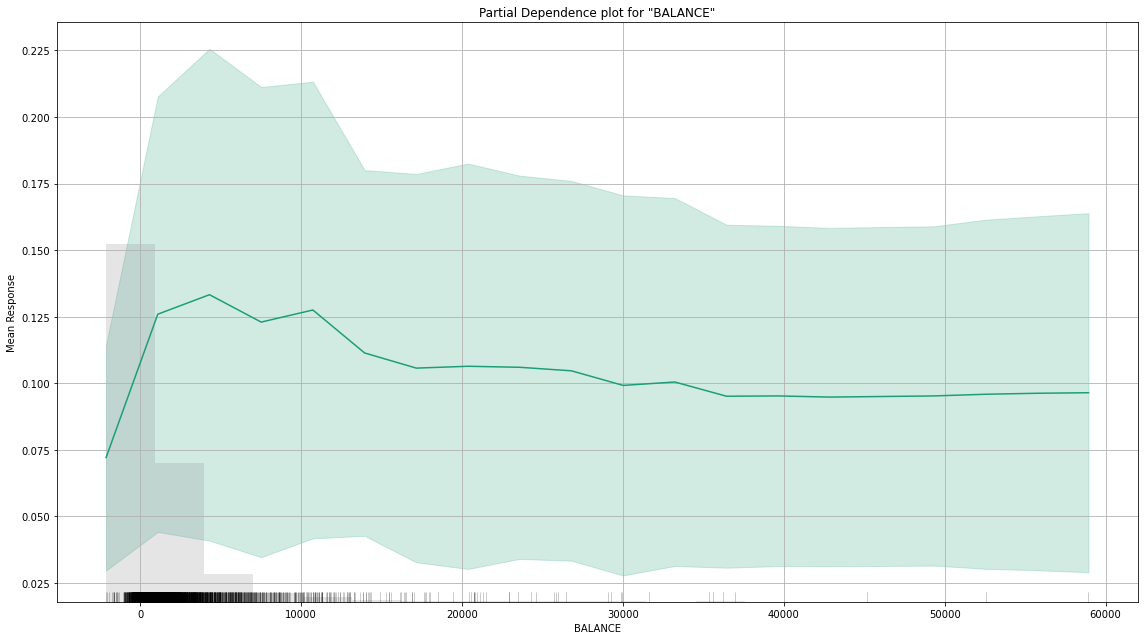

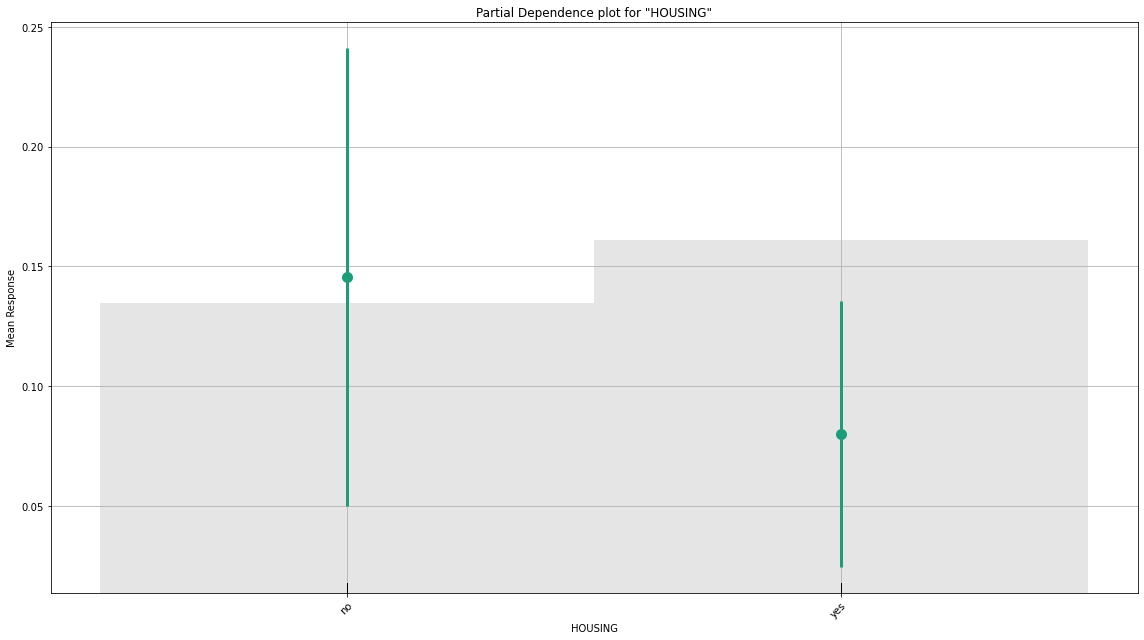

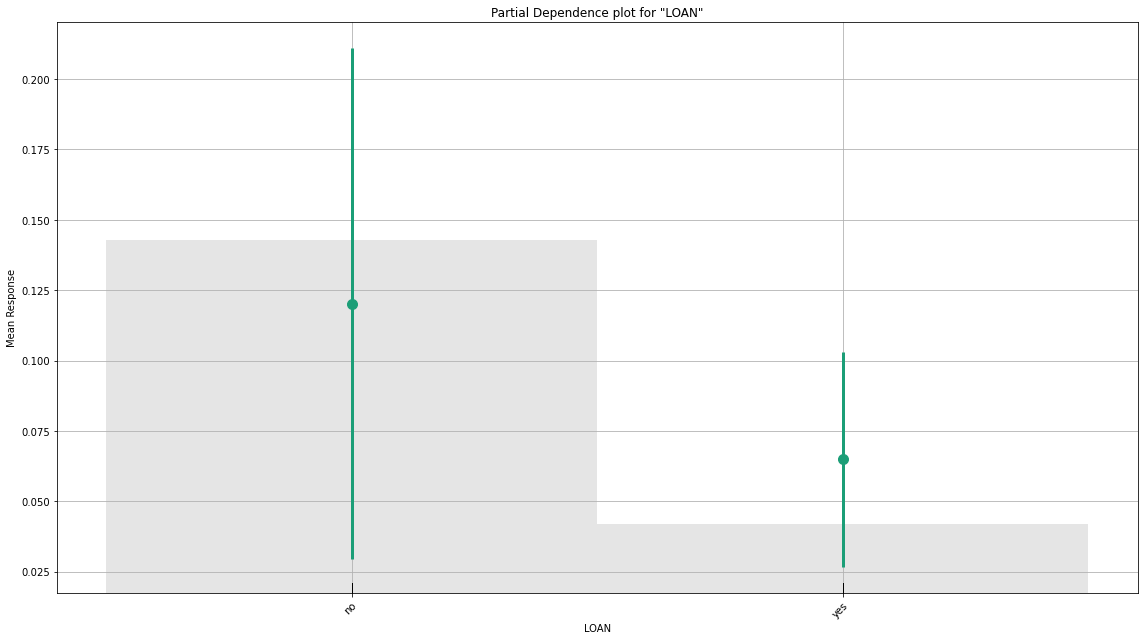

In [40]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a single row prediction
The h2o.explain_row() function provides model explanations for a single row of test data. You can evaluate row-level behavior by specifying the row_index

In [41]:
print(test[25,:])
print(predictions[25,:])

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
42,admin.,married,secondary,no,445,yes,no,no


predict,no,yes
no,0.959855,0.0401453


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454,0.710815,0.326445,0.286215,0.351219,0.306801,0.0941268,13849,0.025501,StackedEnsemble,no,0.943194,0.0568059
StackedEnsemble_AllModels_2_AutoML_8_20220716_204454,0.710589,0.326455,0.286061,0.344115,0.306765,0.0941046,18504,0.043854,StackedEnsemble,no,0.945731,0.0542694
StackedEnsemble_AllModels_1_AutoML_8_20220716_204454,0.710347,0.326806,0.284202,0.351165,0.306946,0.0942157,14430,0.032609,StackedEnsemble,no,0.946735,0.053265
StackedEnsemble_BestOfFamily_2_AutoML_8_20220716_204454,0.710149,0.326896,0.284905,0.346986,0.30696,0.0942247,11239,0.025691,StackedEnsemble,no,0.943927,0.0560729
DRF_1_AutoML_8_20220716_204454,0.704951,0.33437,0.286943,0.34251,0.309266,0.0956456,3593,0.023886,DRF,no,0.959855,0.0401453
GBM_2_AutoML_8_20220716_204454,0.701234,0.331476,0.263136,0.352149,0.309638,0.0958756,1356,0.015122,GBM,no,0.94689,0.0531095
XRT_1_AutoML_8_20220716_204454,0.700893,0.337806,0.271597,0.354919,0.312968,0.0979493,2399,0.014112,DRF,no,0.935178,0.0648225
GBM_4_AutoML_8_20220716_204454,0.700447,0.334691,0.270076,0.351465,0.309524,0.095805,2296,0.024992,GBM,no,0.950664,0.0493364
GBM_3_AutoML_8_20220716_204454,0.700335,0.332374,0.260778,0.353529,0.309812,0.0959832,1677,0.016877,GBM,no,0.951267,0.048733
StackedEnsemble_BestOfFamily_1_AutoML_8_20220716_204454,0.699799,0.33095,0.261124,0.358147,0.30917,0.0955859,11065,0.018466,StackedEnsemble,no,0.960015,0.0399846


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

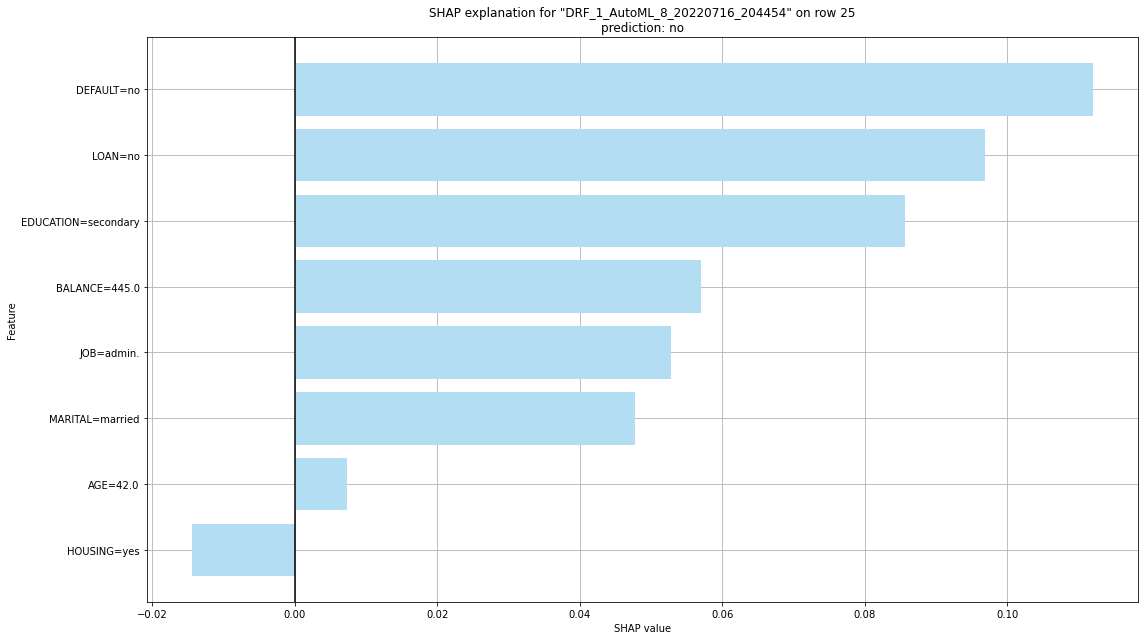

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
StackedEnsemble_BestOfFamily_3_AutoML_8_20220716_204454,0.710815,0.326445,0.286215,0.351219,0.306801,0.0941268,13849,0.025501,StackedEnsemble,no,0.943194,0.0568059
StackedEnsemble_AllModels_2_AutoML_8_20220716_204454,0.710589,0.326455,0.286061,0.344115,0.306765,0.0941046,18504,0.043854,StackedEnsemble,no,0.945731,0.0542694
StackedEnsemble_AllModels_1_AutoML_8_20220716_204454,0.710347,0.326806,0.284202,0.351165,0.306946,0.0942157,14430,0.032609,StackedEnsemble,no,0.946735,0.053265
StackedEnsemble_BestOfFamily_2_AutoML_8_20220716_204454,0.710149,0.326896,0.284905,0.346986,0.30696,0.0942247,11239,0.025691,StackedEnsemble,no,0.943927,0.0560729
DRF_1_AutoML_8_20220716_204454,0.704951,0.33437,0.286943,0.34251,0.309266,0.0956456,3593,0.023886,DRF,no,0.959855,0.0401453
GBM_2_AutoML_8_20220716_204454,0.701234,0.331476,0.263136,0.352149,0.309638,0.0958756,1356,0.015122,GBM,no,0.94689,0.0531095
XRT_1_AutoML_8_20220716_204454,0.700893,0.337806,0.271597,0.354919,0.312968,0.0979493,2399,0.014112,DRF,no,0.935178,0.0648225
GBM_4_AutoML_8_20220716_204454,0.700447,0.334691,0.270076,0.351465,0.309524,0.095805,2296,0.024992,GBM,no,0.950664,0.0493364
GBM_3_AutoML_8_20220716_204454,0.700335,0.332374,0.260778,0.353529,0.309812,0.0959832,1677,0.016877,GBM,no,0.951267,0.048733
StackedEnsemble_BestOfFamily_1_AutoML_8_20220716_204454,0.699799,0.33095,0.261124,0.358147,0.30917,0.0955859,11065,0.018466,StackedEnsemble,no,0.960015,0.0399846


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [42]:
# Explain twentyfith row with all AutoML models
aml.explain_row(test, row_index=25)

# Individual conditional expectation (ICE) plot
an individual conditional expectation (ICE) plot shows the dependence between the target function and an input feature of interest. However, unlike a PDP, which shows the average effect of the input feature, an ICE plot visualizes the dependence of the prediction on a feature for each sample separately with one line per sample. Due to the limits of human perception, only one input feature of interest is supported for ICE plots.

In [43]:
print(test[6662,:])
print(predictions[6662,:])

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
63,retired,married,primary,no,3738,no,no,no


predict,no,yes
yes,0.748755,0.251245


C:\ProgramData\Anaconda3\lib\site-packages\h2o\explanation\_explain.py:2799: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

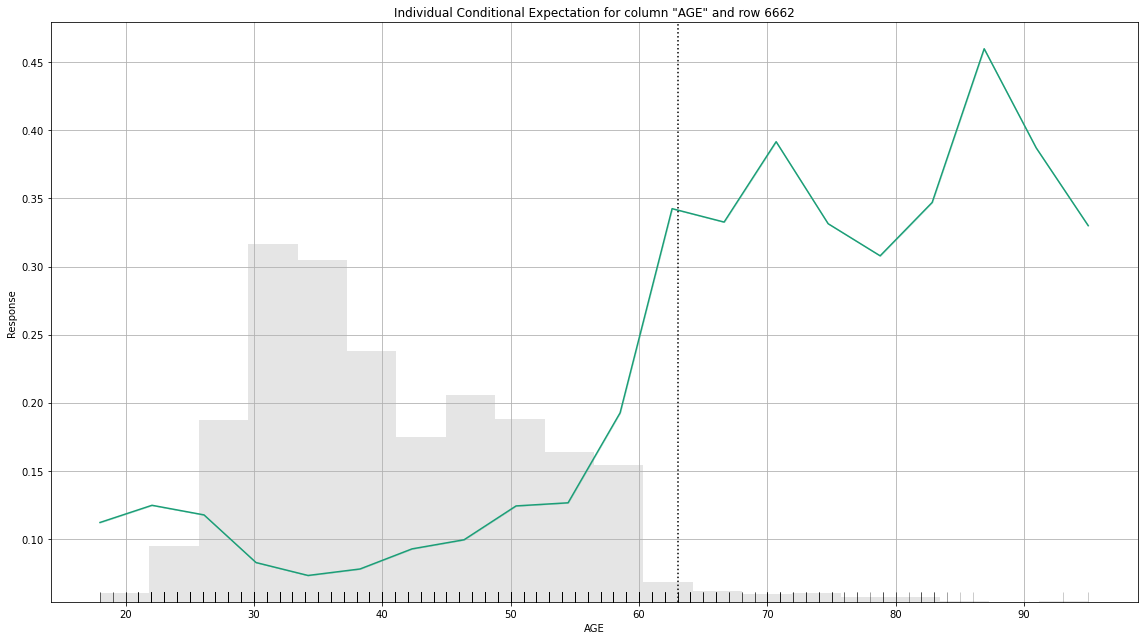

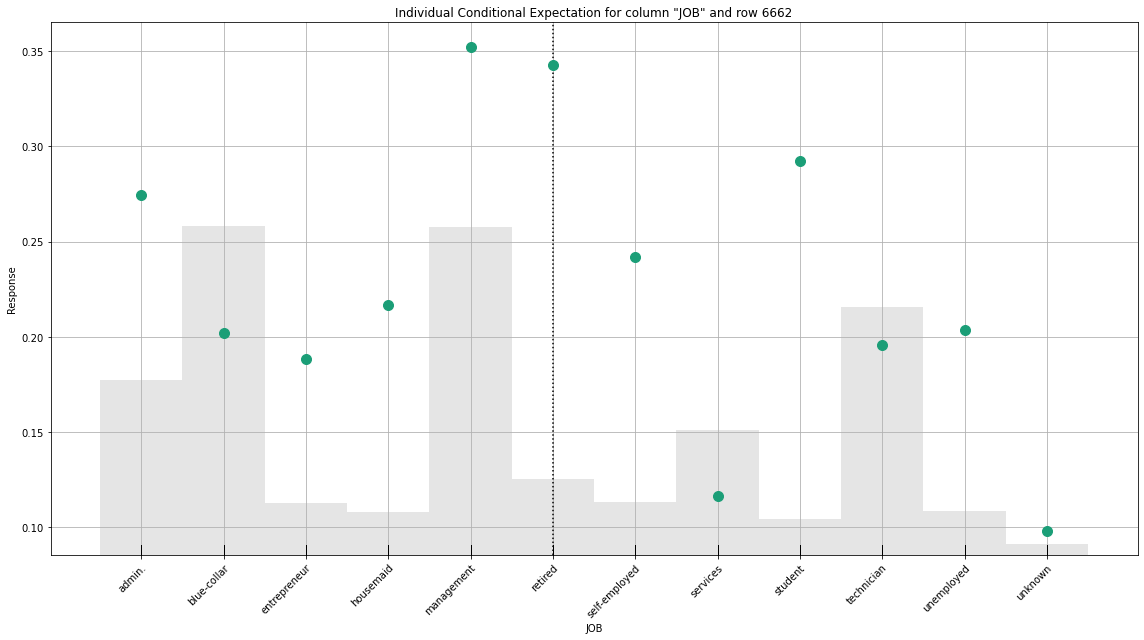

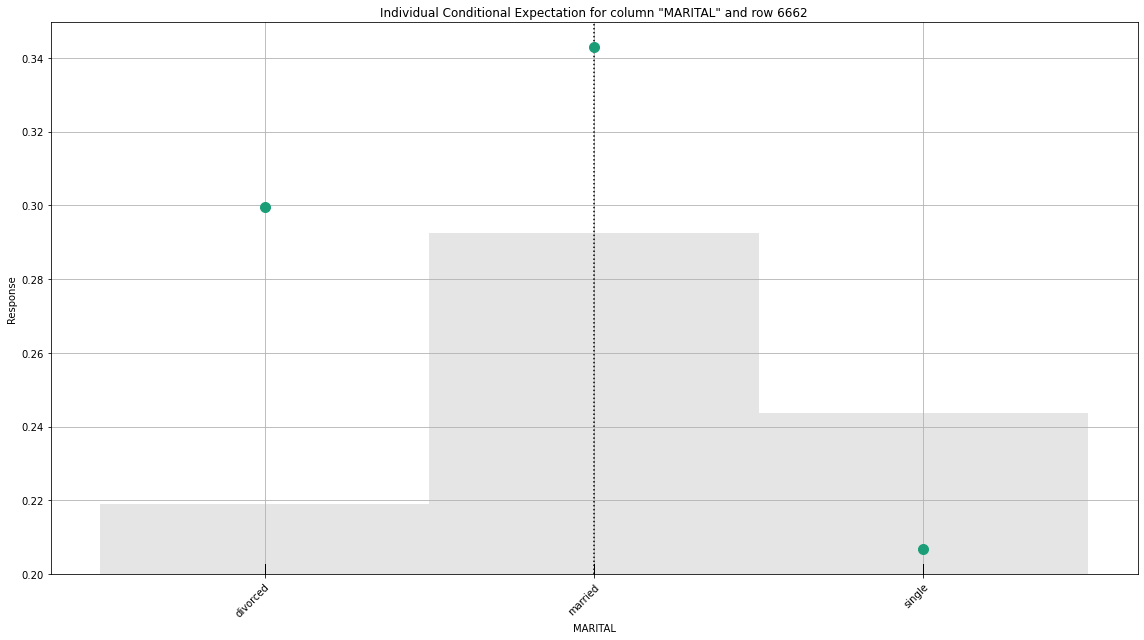

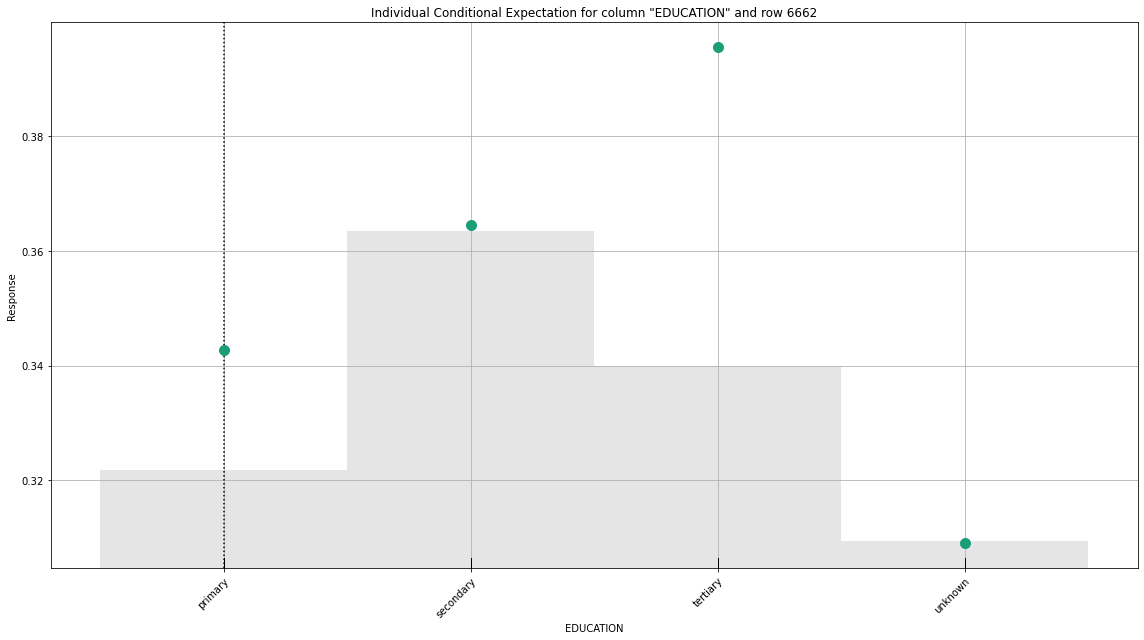

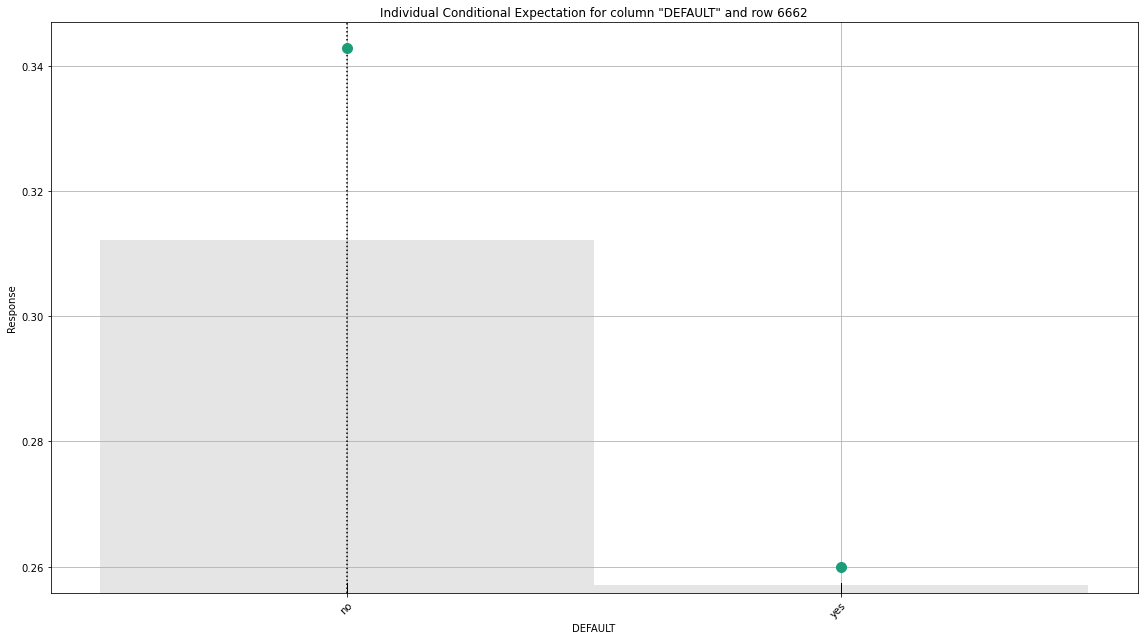

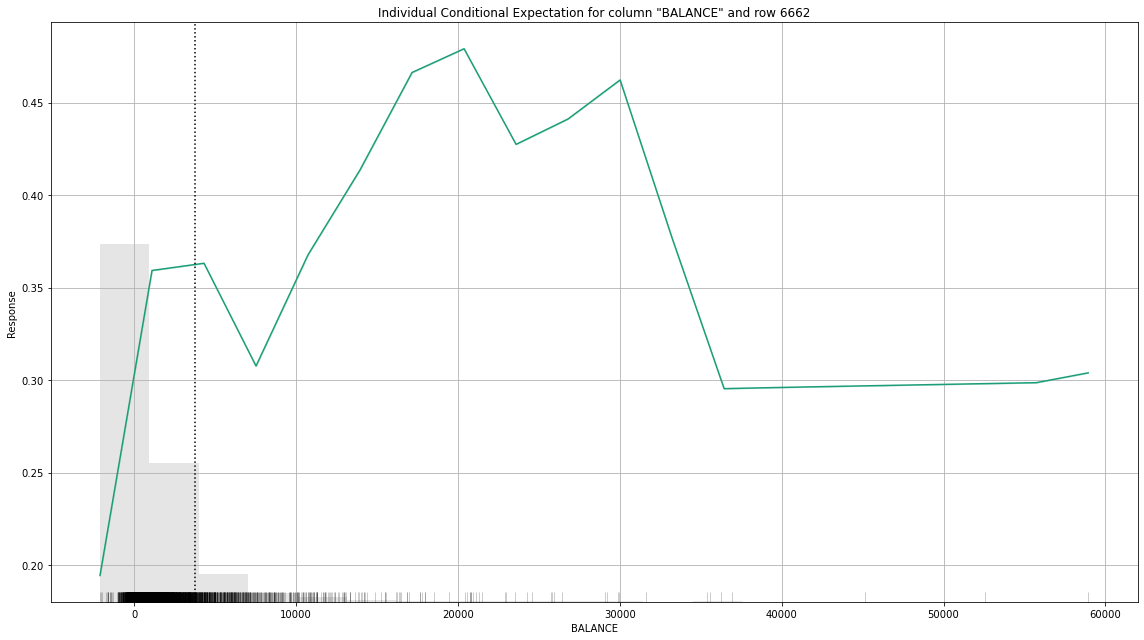

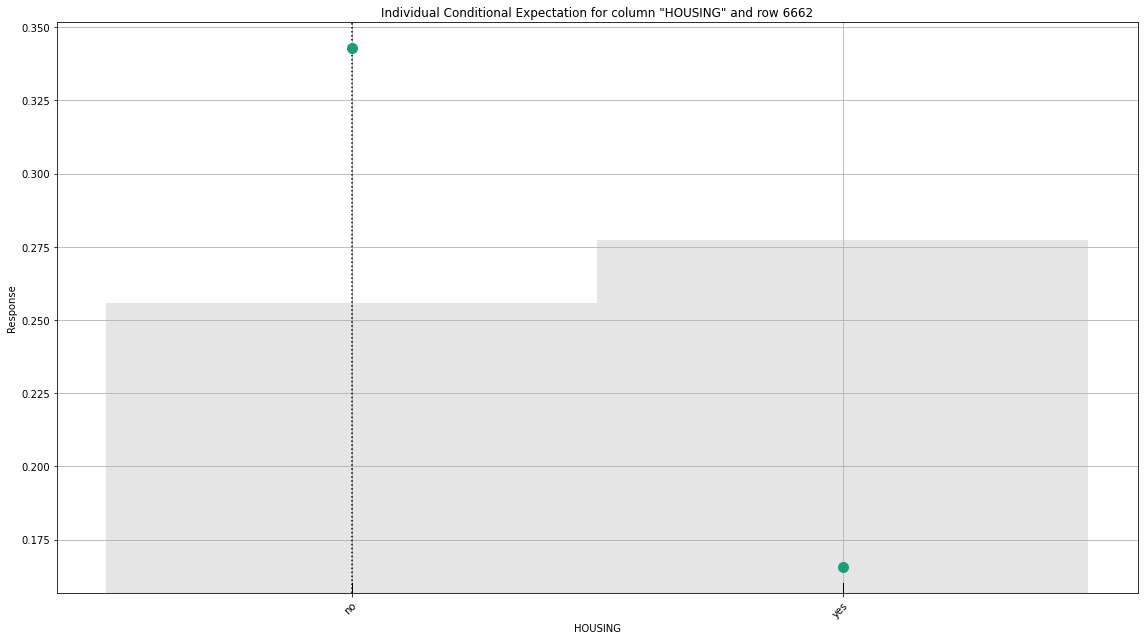

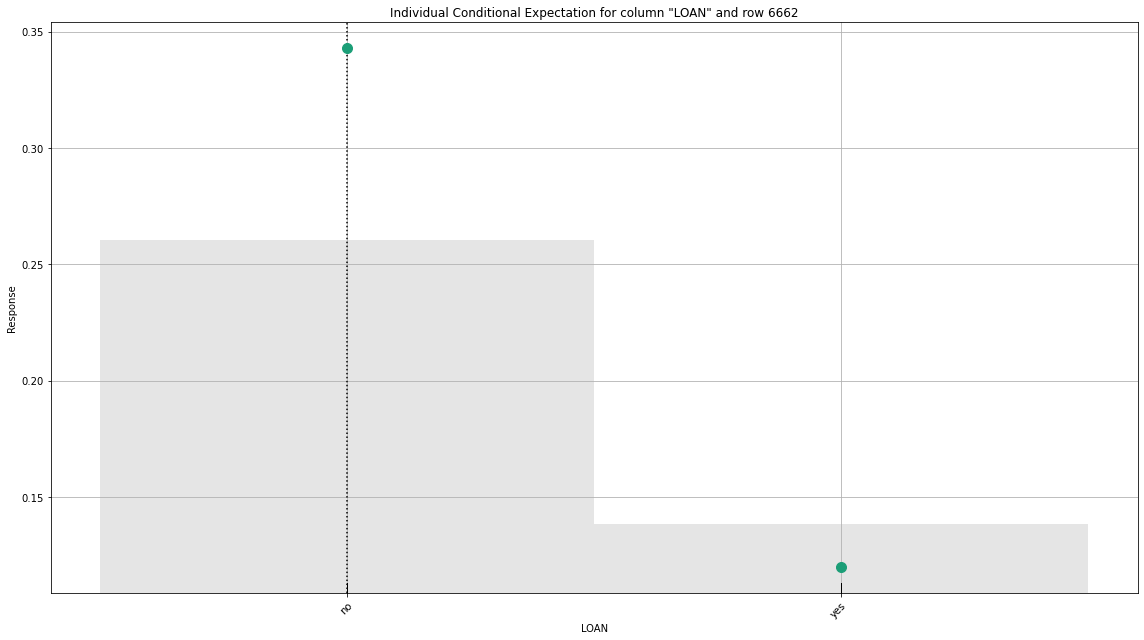

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [44]:
# Explain 6662 row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=6662)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

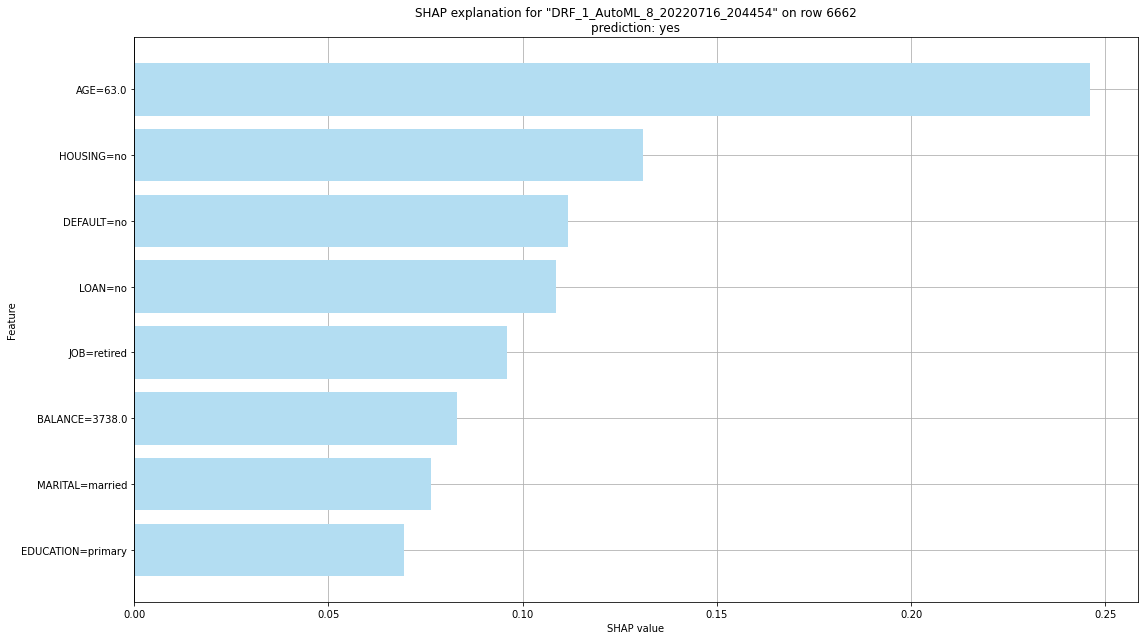

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

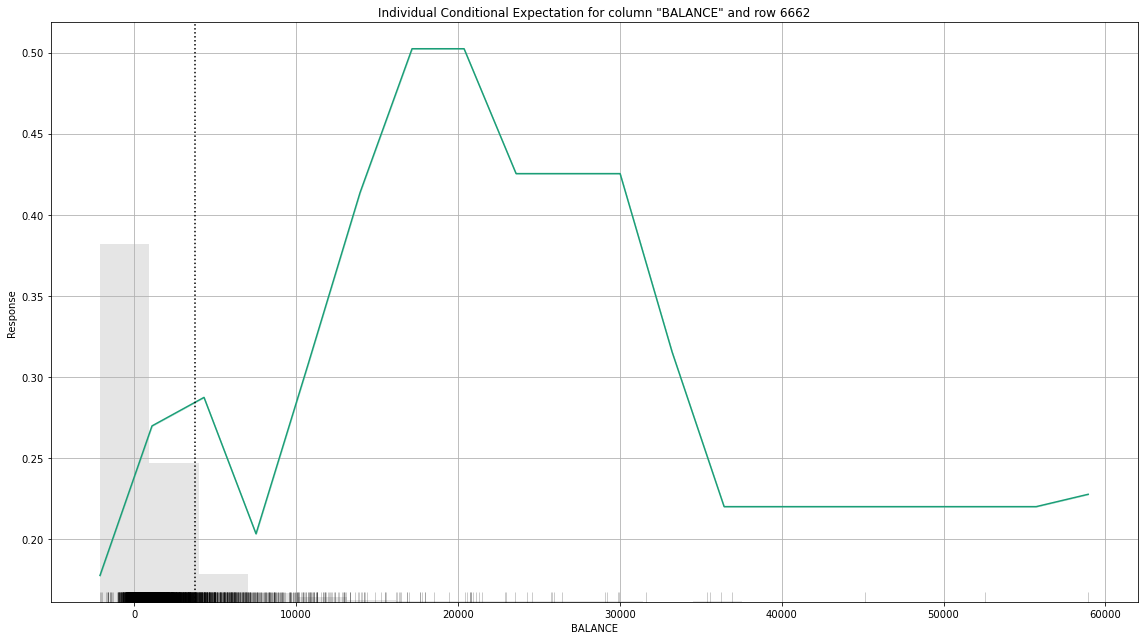

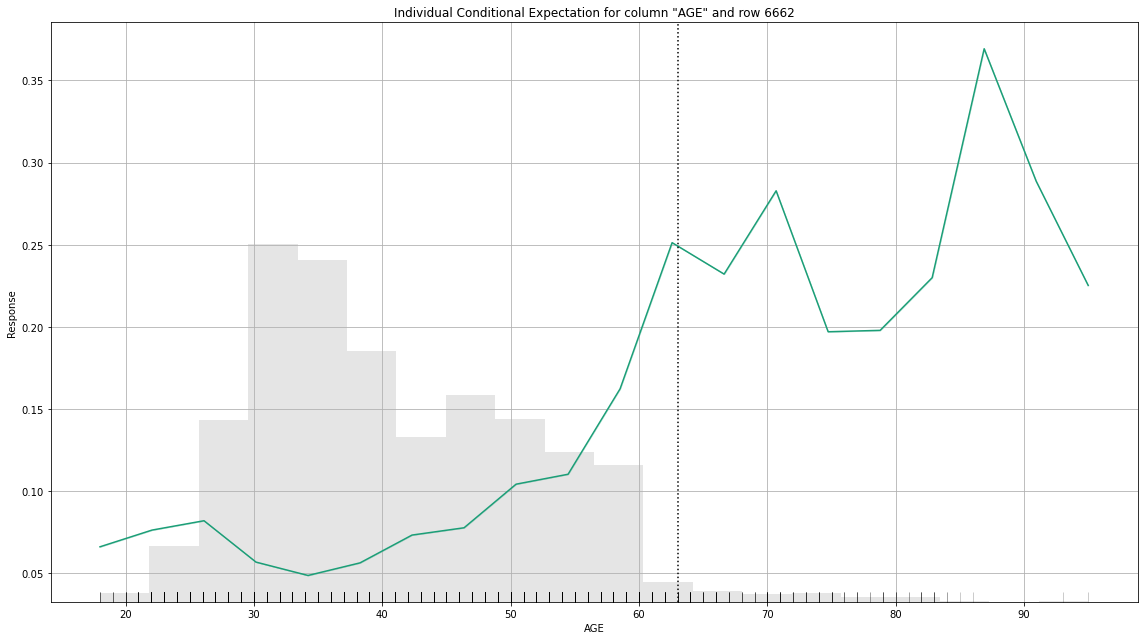

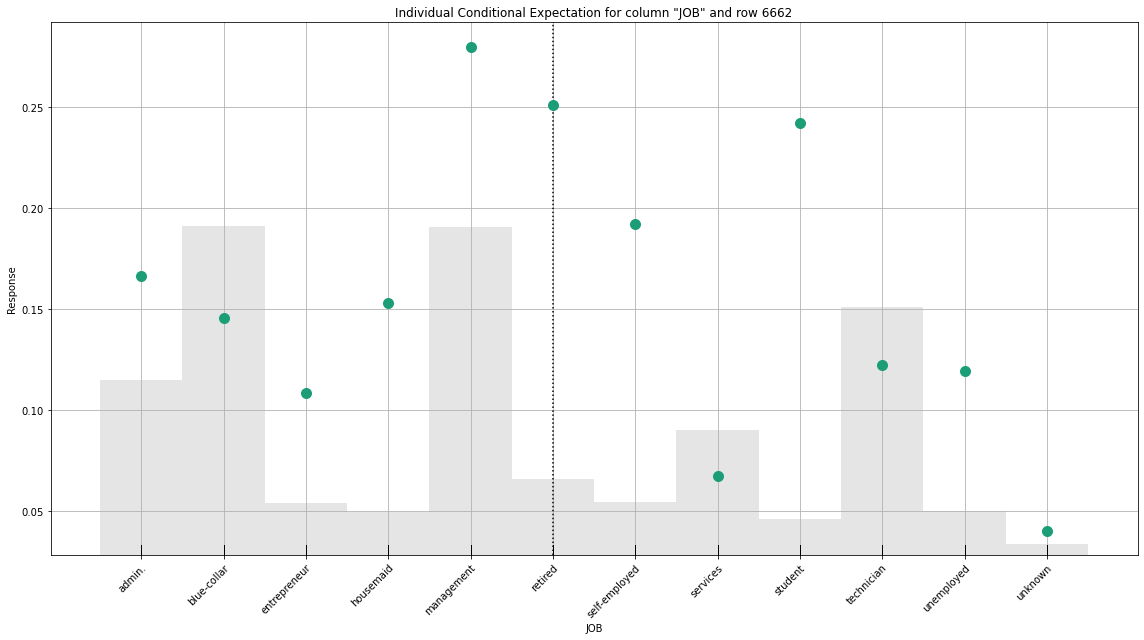

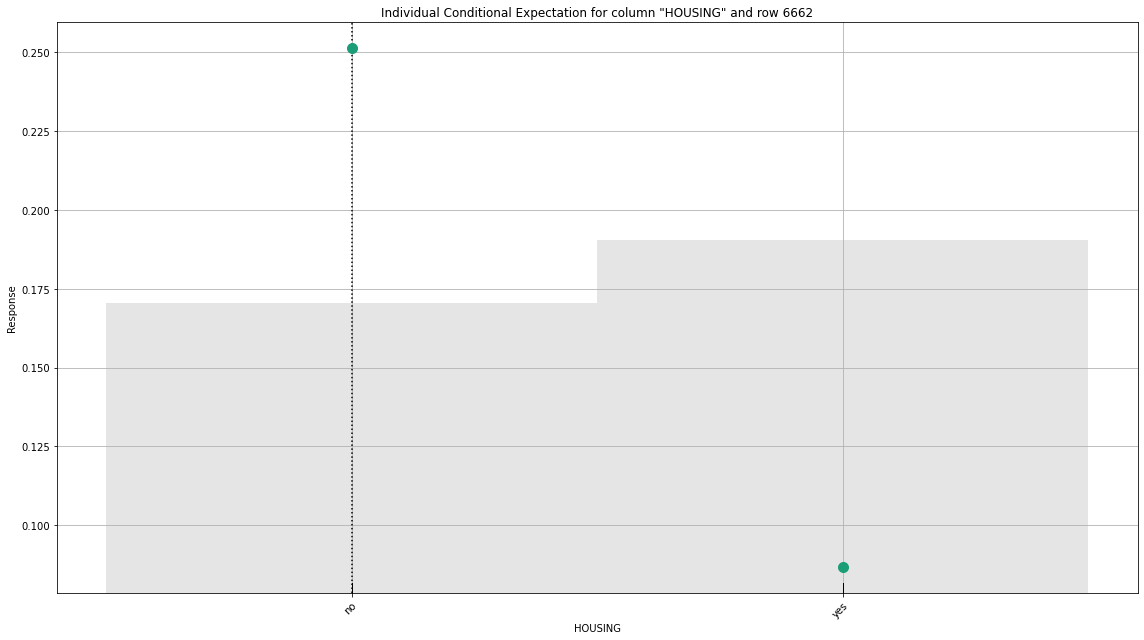

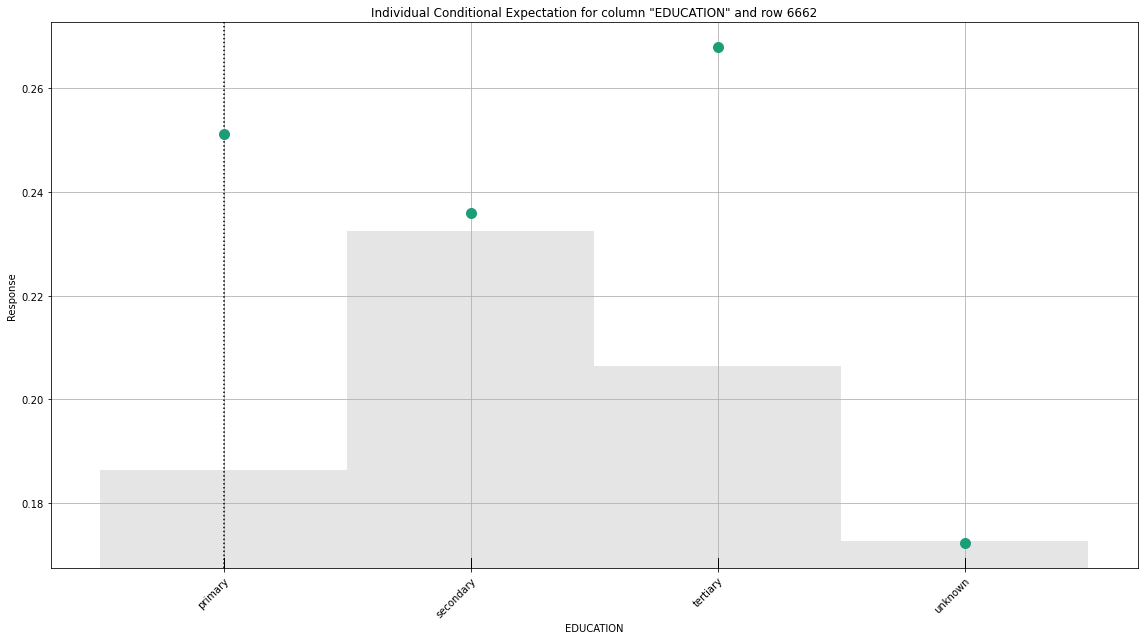

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [45]:
model.explain_row(test,row_index=6662)

# SHAP Summary
SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

Positive SHAP value means positive impact on prediction, leading the model to predict 1(e.g. Loan approved). Negative SHAP value means negative impact, leading the model to predict 0 (e.g. Loan didnot approved).

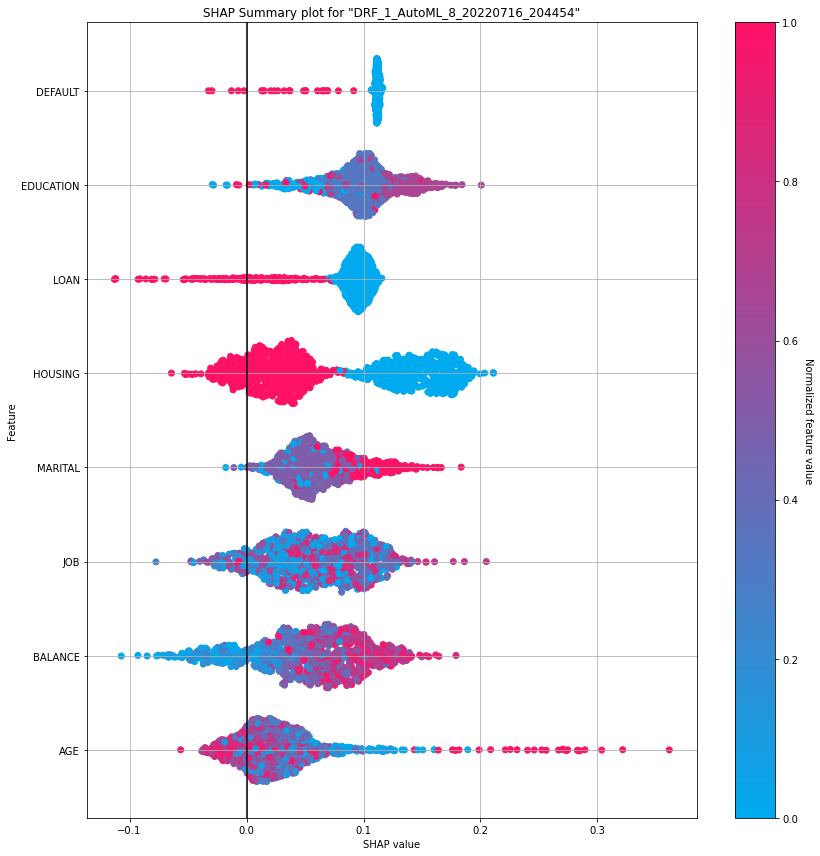

In [46]:
shap_plot = model.shap_summary_plot(test)

# SHAP Local Explanation
SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [47]:
print(test[2000,:])
print(predictions[2000,:])

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
53,technician,married,tertiary,no,673,yes,no,no


predict,no,yes
no,0.962531,0.0374686


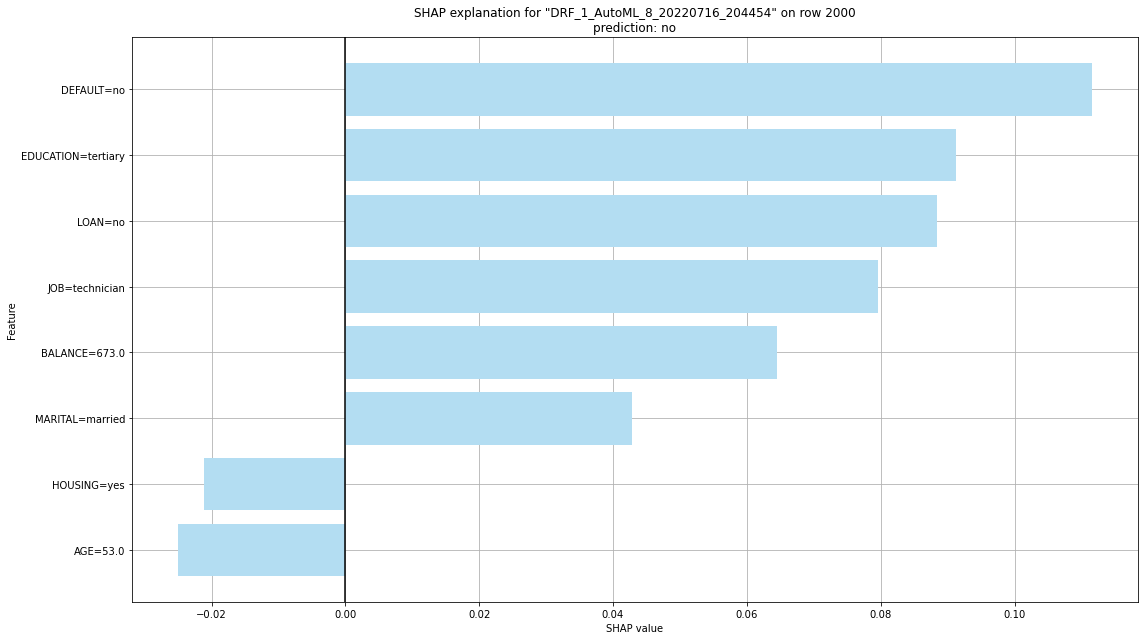

In [48]:
shapr_plot = model.shap_explain_row_plot(test, row_index=2000)

In [49]:
print(test[5000,:])
print(predictions[5000,:])

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
37,management,married,tertiary,no,630,no,no,yes


predict,no,yes
yes,0.844654,0.155346


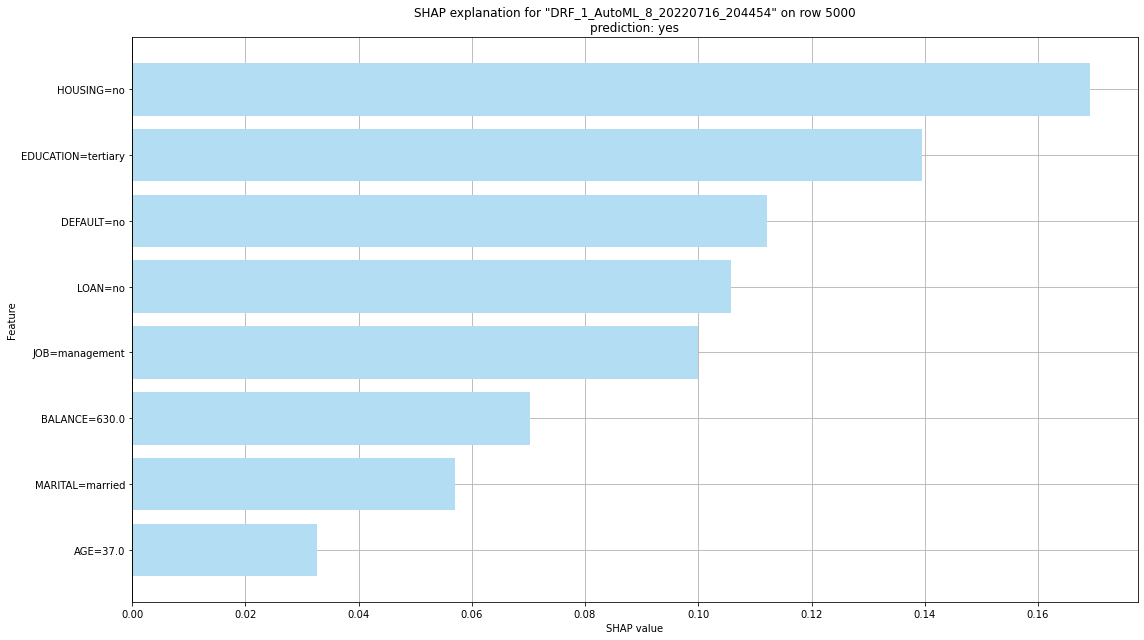

In [50]:
shapr_plot = model.shap_explain_row_plot(test, row_index=5000)

In [51]:
print(test[6662,:])
print(predictions[6662,:])

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,LOAN_STATUS
63,retired,married,primary,no,3738,no,no,no


predict,no,yes
yes,0.748755,0.251245


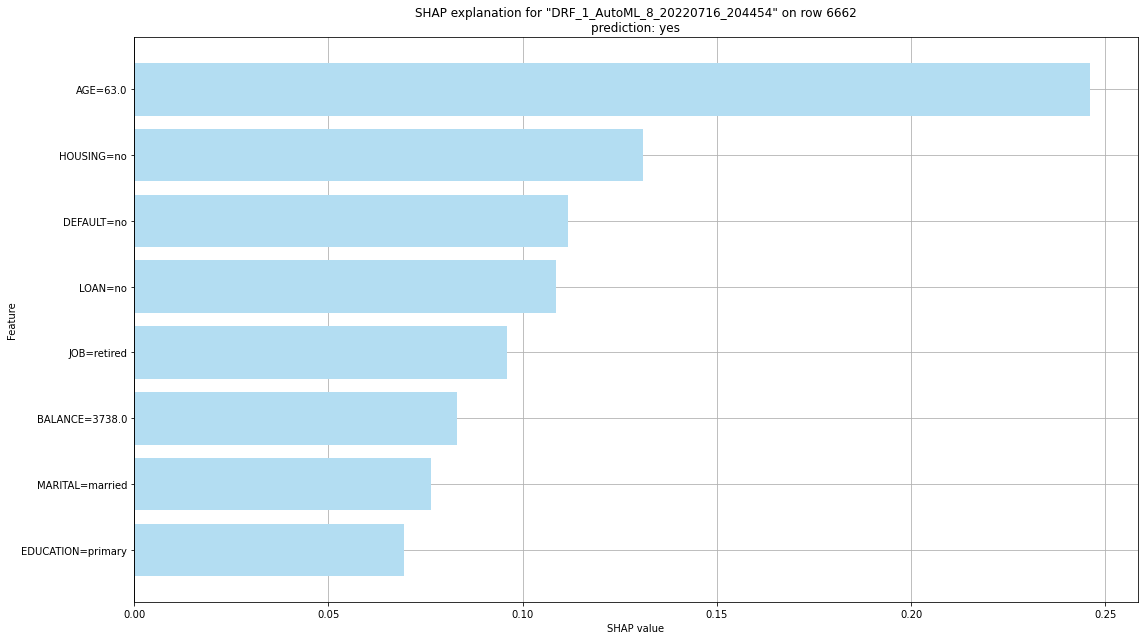

In [52]:
shapr_plot = model.shap_explain_row_plot(test, row_index=6662)

# Partial Dependence (PD) Plots
Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

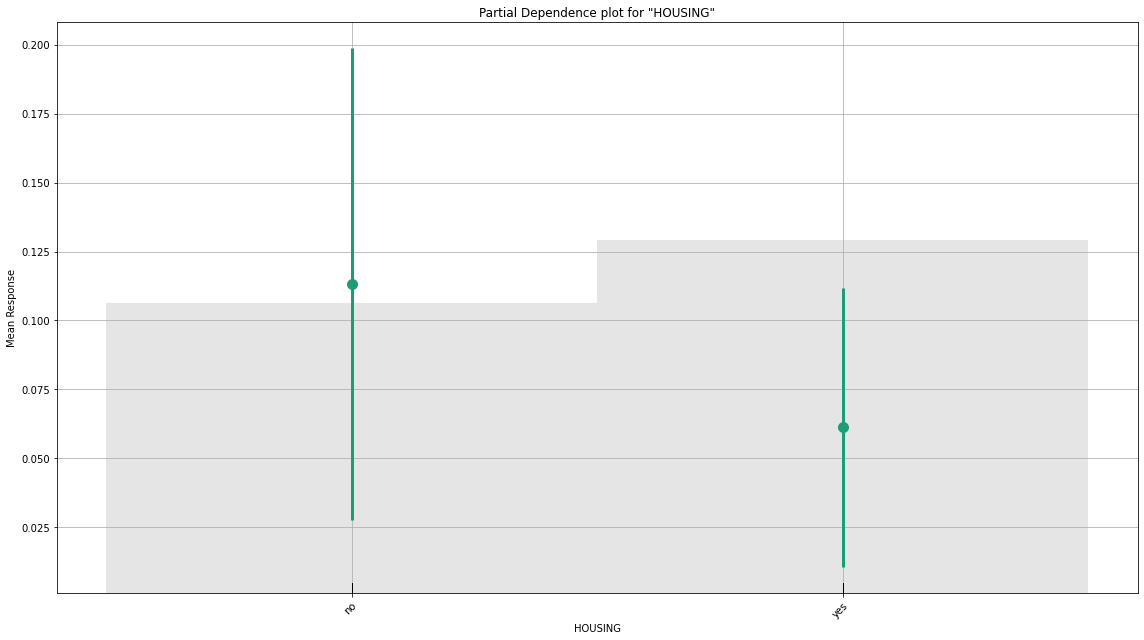

In [53]:
model.pd_plot(test, 'HOUSING')

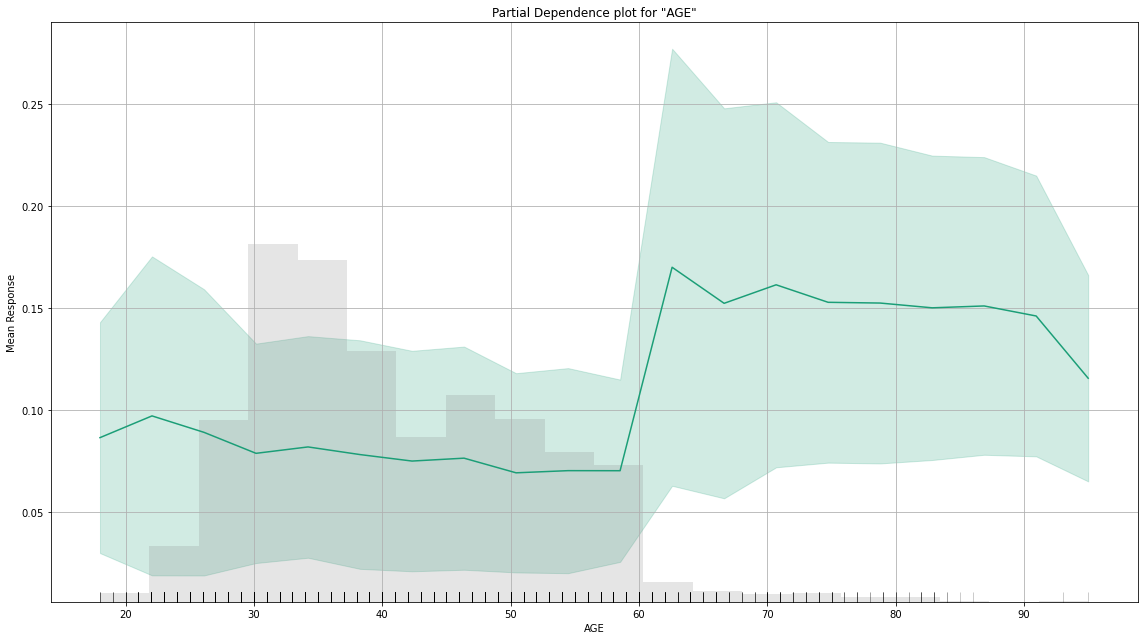

In [54]:
model.pd_plot(test, 'AGE')

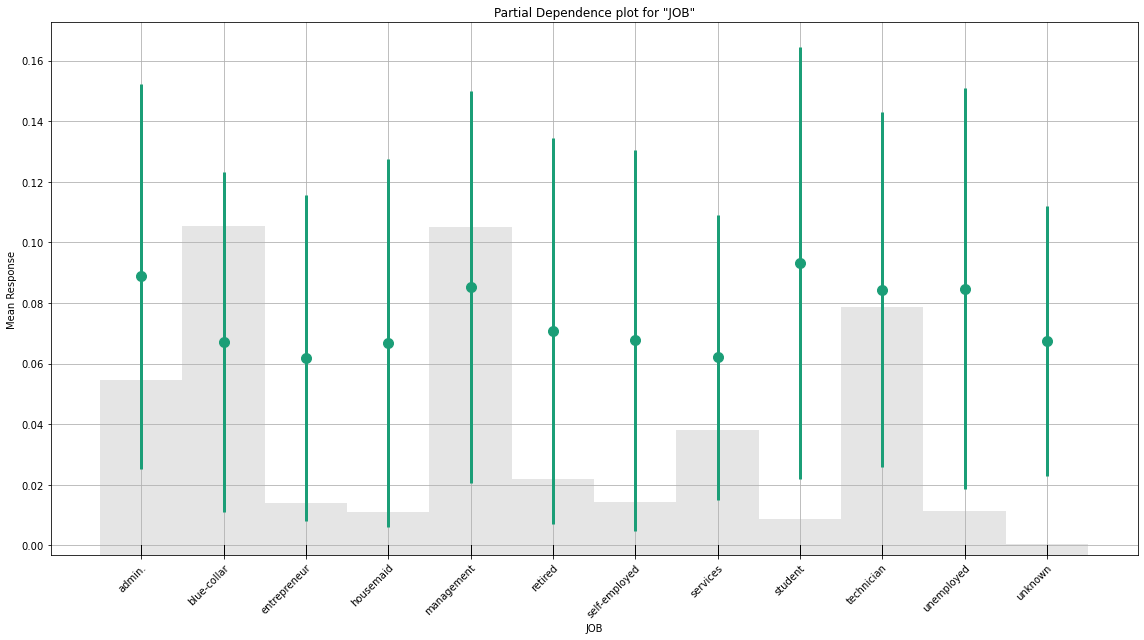

In [55]:
model.pd_plot(test, 'JOB')

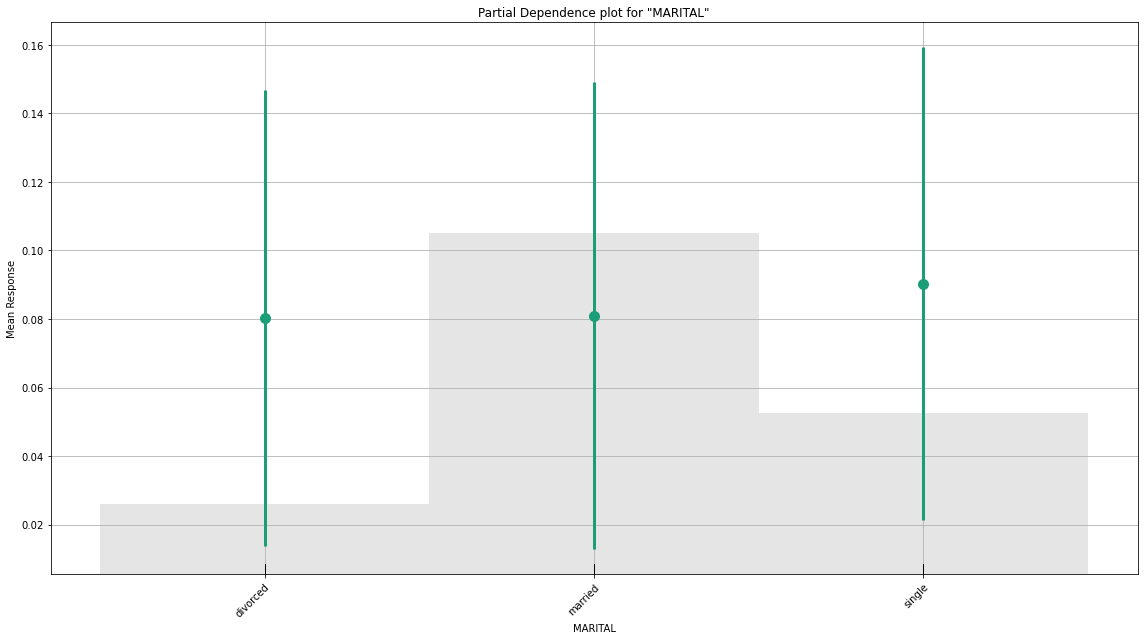

In [56]:
model.pd_plot(test, 'MARITAL')

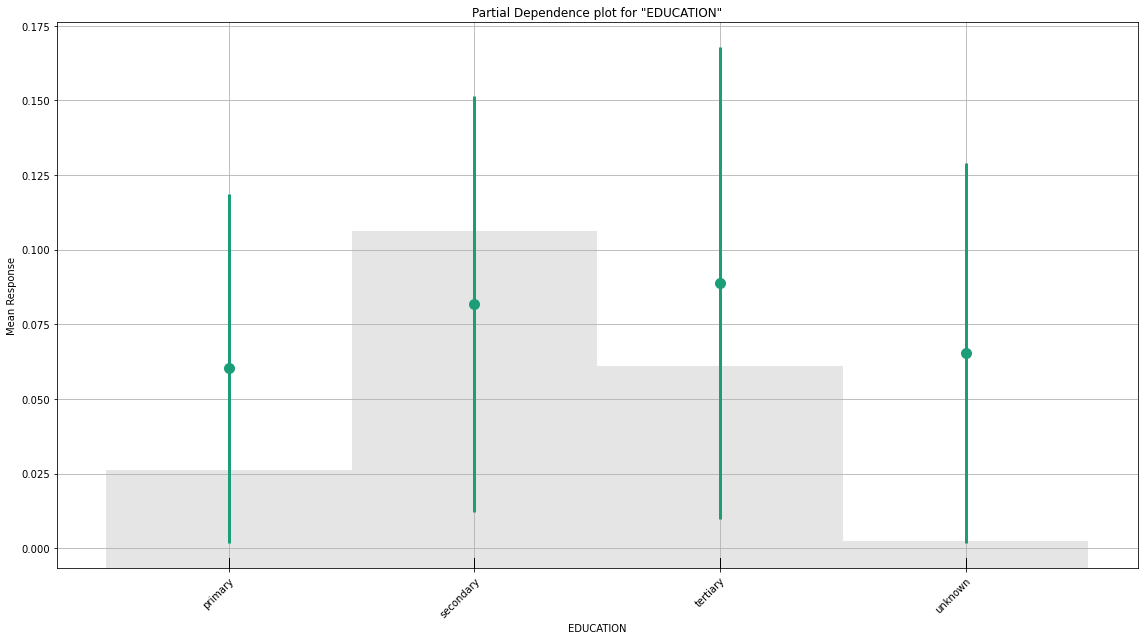

In [57]:
model.pd_plot(test, 'EDUCATION')

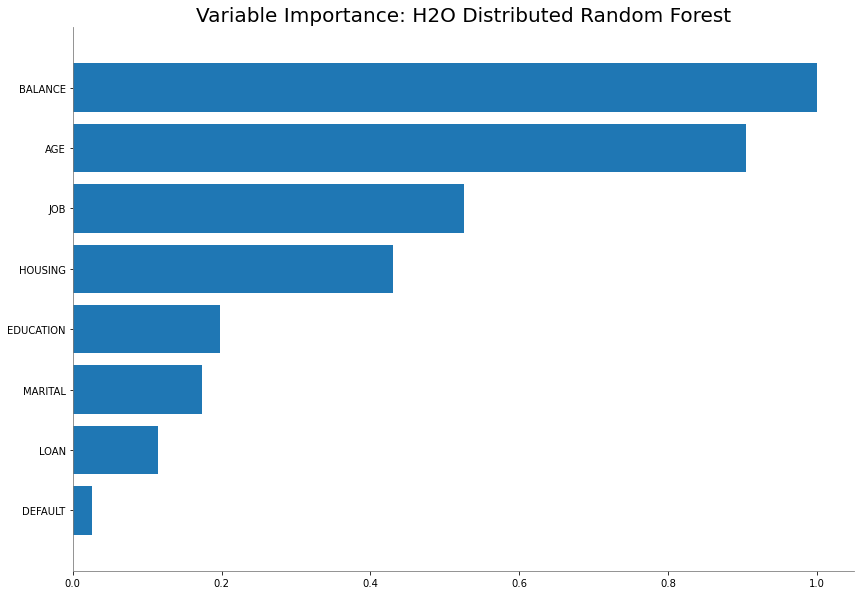

<Figure size 432x288 with 0 Axes>

In [58]:
ra_plot = model.varimp_plot()

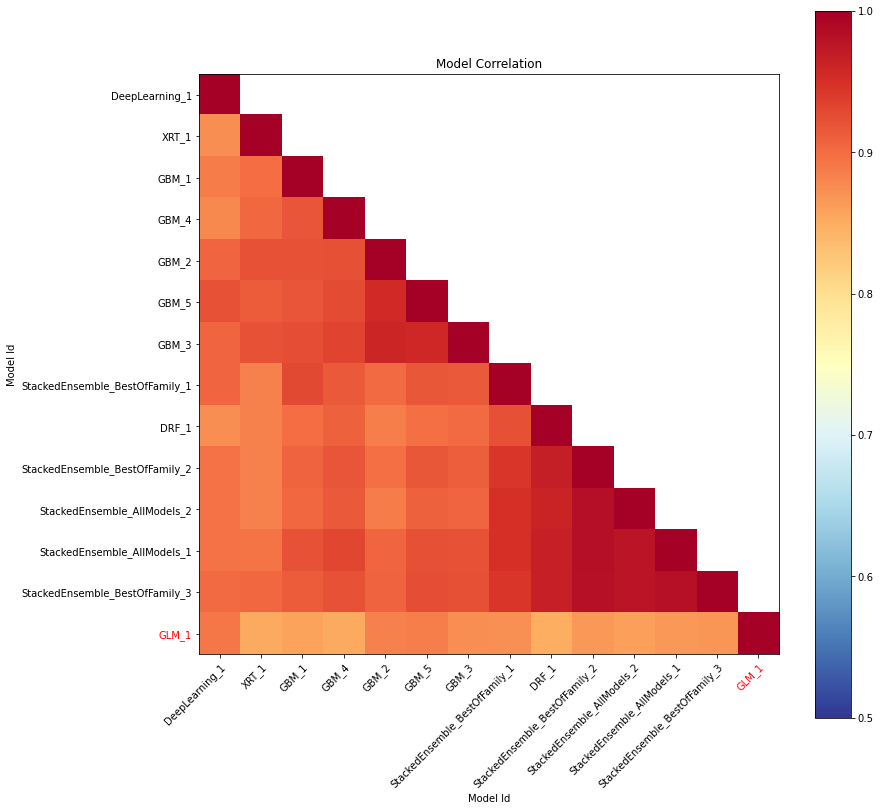

In [59]:
mc_plot = aml.model_correlation_heatmap(test)

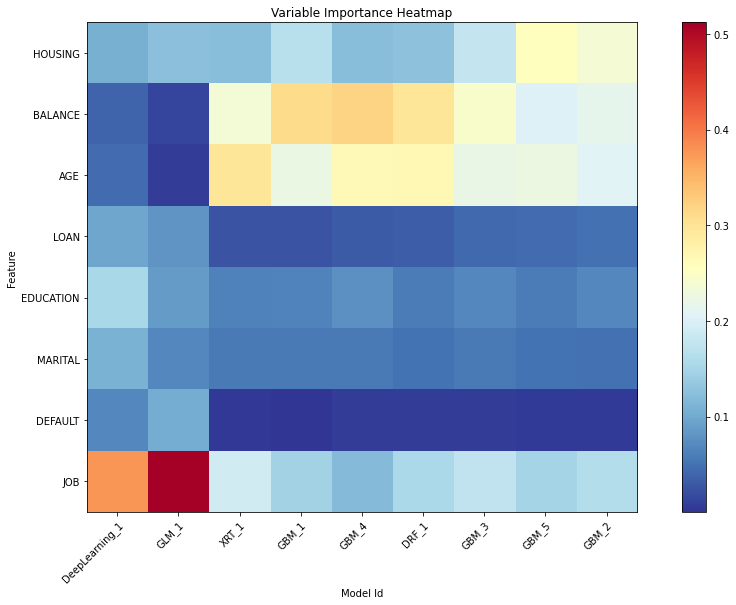

In [60]:
#Variable Importance Heatmap : Variable importance heatmap shows variable importance across multiple models.
va_plot = aml.varimp_heatmap()

# Learning Curve Plot
The learning curve plot shows error metric dependence on learning progress (e.g. RMSE vs. number of trees trained so far in GBM). This plot can help to diagnose whether the model is overfitting or underfitting – in an ideal situation, the training and validation curves converge. There can be up to 4 curves showing the error, and all available metrics will be plotted:

Training

Validation (available when validation_frame is set)

Training on CV Models (available when nfolds>1)

Cross-validation (available when nfolds>1)

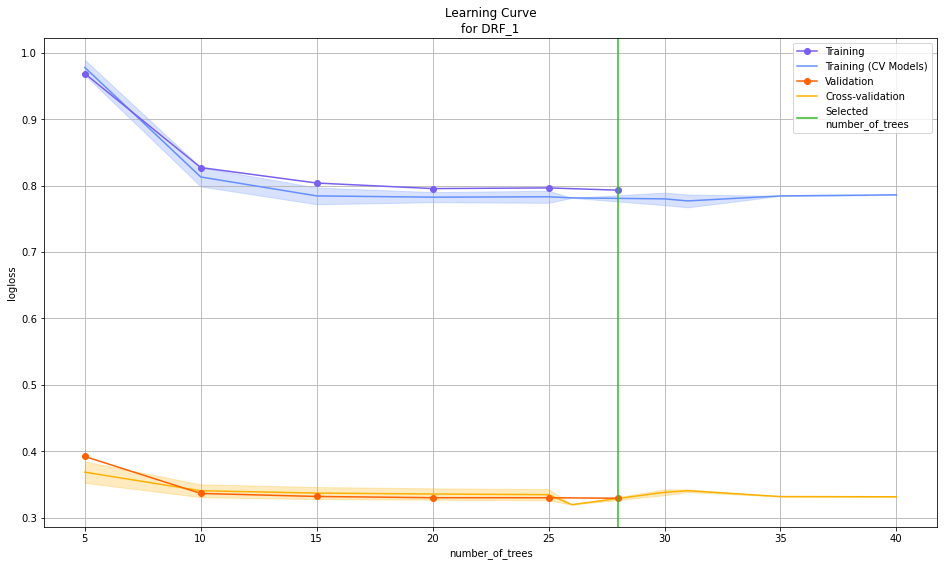

In [61]:
model.learning_curve_plot()

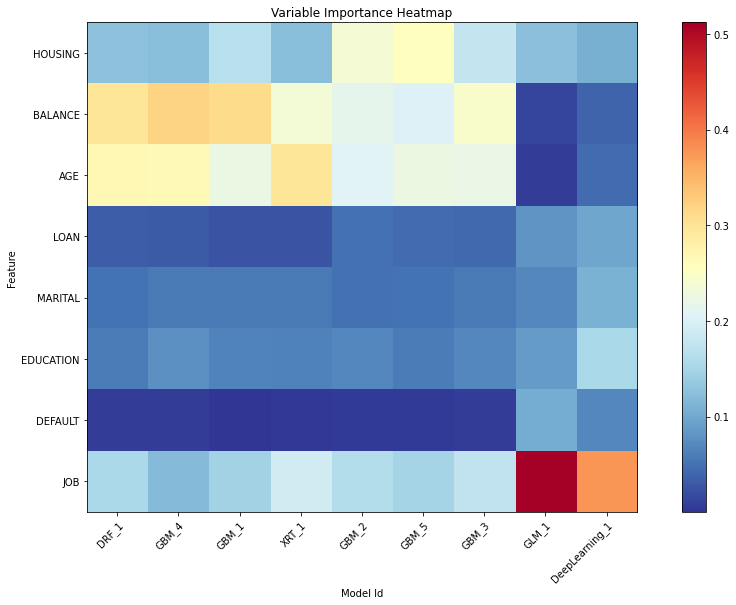

In [62]:
# or if some subset of the models is needed a slice of leaderboard can be used, e.g., using MAE as the sorting metric
va_plot = h2o.varimp_heatmap(aml.leaderboard.sort("auc").head(10))

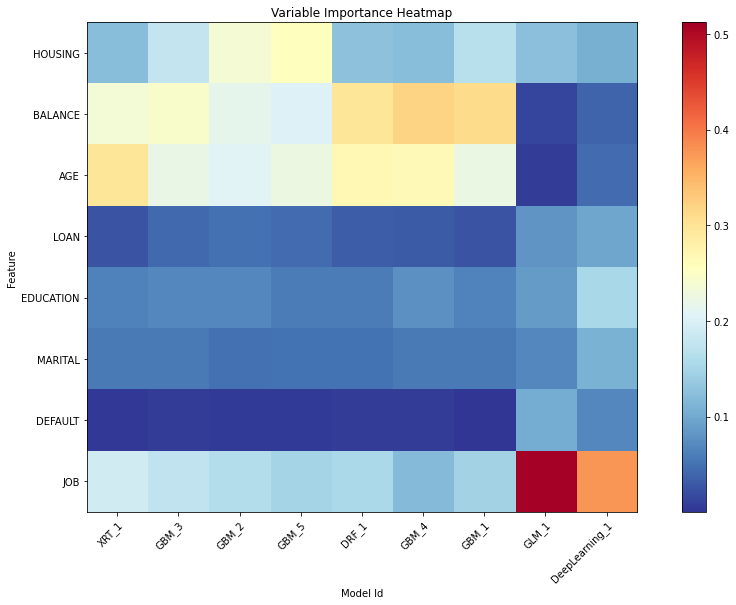

In [63]:
# or even extended leaderboard can be used
va_plot = h2o.varimp_heatmap(h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms").head(10))